### Late Dark Energy  
Diogo H F de Souza, Sep 5 2023

### Section 1 - $\Lambda$ CDM: CAMBBase vs CAMBLateDE

In [1]:
# CAMB Base
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBBase/camb


In [2]:
base_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            w = -1,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
k = 0.3
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
base_results = camb.get_results(base_cosmology)

rho_de = base_results.get_background_densities(scale_factor)['de']
hubble = base_results.hubble_parameter(redshift)
cls = base_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = base_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = base_results.get_redshift_evolution(k, redshift, 'delta_photon')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBBase/docs/base_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBBase/docs/base_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBBase/docs/base_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBBase/docs/base_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBBase/docs/base_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),delta_photon.flatten()]))

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 1, w0 = -1,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
k = 0.3
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),delta_photon.flatten()]))

In [1]:
# Comparing CAMBBase with CAMBLateDE
import numpy as np
import matplotlib.pyplot as plt
font_size=20

path = '/home/grads/data/Diogo/'

base_background = np.genfromtxt(path+'CAMBBase/docs/base_background.txt',unpack=True)
base_cls = np.genfromtxt(path+'CAMBBase/docs/base_cls.txt',unpack=True)
base_ks = np.genfromtxt(path+'CAMBBase/docs/base_ks.txt',unpack=True)
base_pk = np.genfromtxt(path+'CAMBBase/docs/base_pk.txt',unpack=True)
base_perturbations = np.genfromtxt(path+'CAMBBase/docs/base_perturbations.txt',unpack=True)

latede_background = np.genfromtxt(path+'CAMBLateDE/docs/latede_background.txt',unpack=True)
latede_cls = np.genfromtxt(path+'CAMBLateDE/docs/latede_cls.txt',unpack=True)
latede_ks = np.genfromtxt(path+'CAMBLateDE/docs/latede_ks.txt',unpack=True)
latede_pk = np.genfromtxt(path+'CAMBLateDE/docs/latede_pk.txt',unpack=True)
latede_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/latede_perturbations.txt',unpack=True)

In [2]:
# CAMB BASE outputs
scale_factor = base_background[0]
redshift = 1/scale_factor - 1
base_rhode = base_background[1]
base_hubble = base_background[2]
base_delta_de = base_perturbations[0]
base_delta_photon = base_perturbations[1]
ells = [i for i in range(len(base_cls))]

# CAMB LATEDE outputs
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]
latede_delta_de = latede_perturbations[0]
latede_delta_photon = latede_perturbations[1]

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,25.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

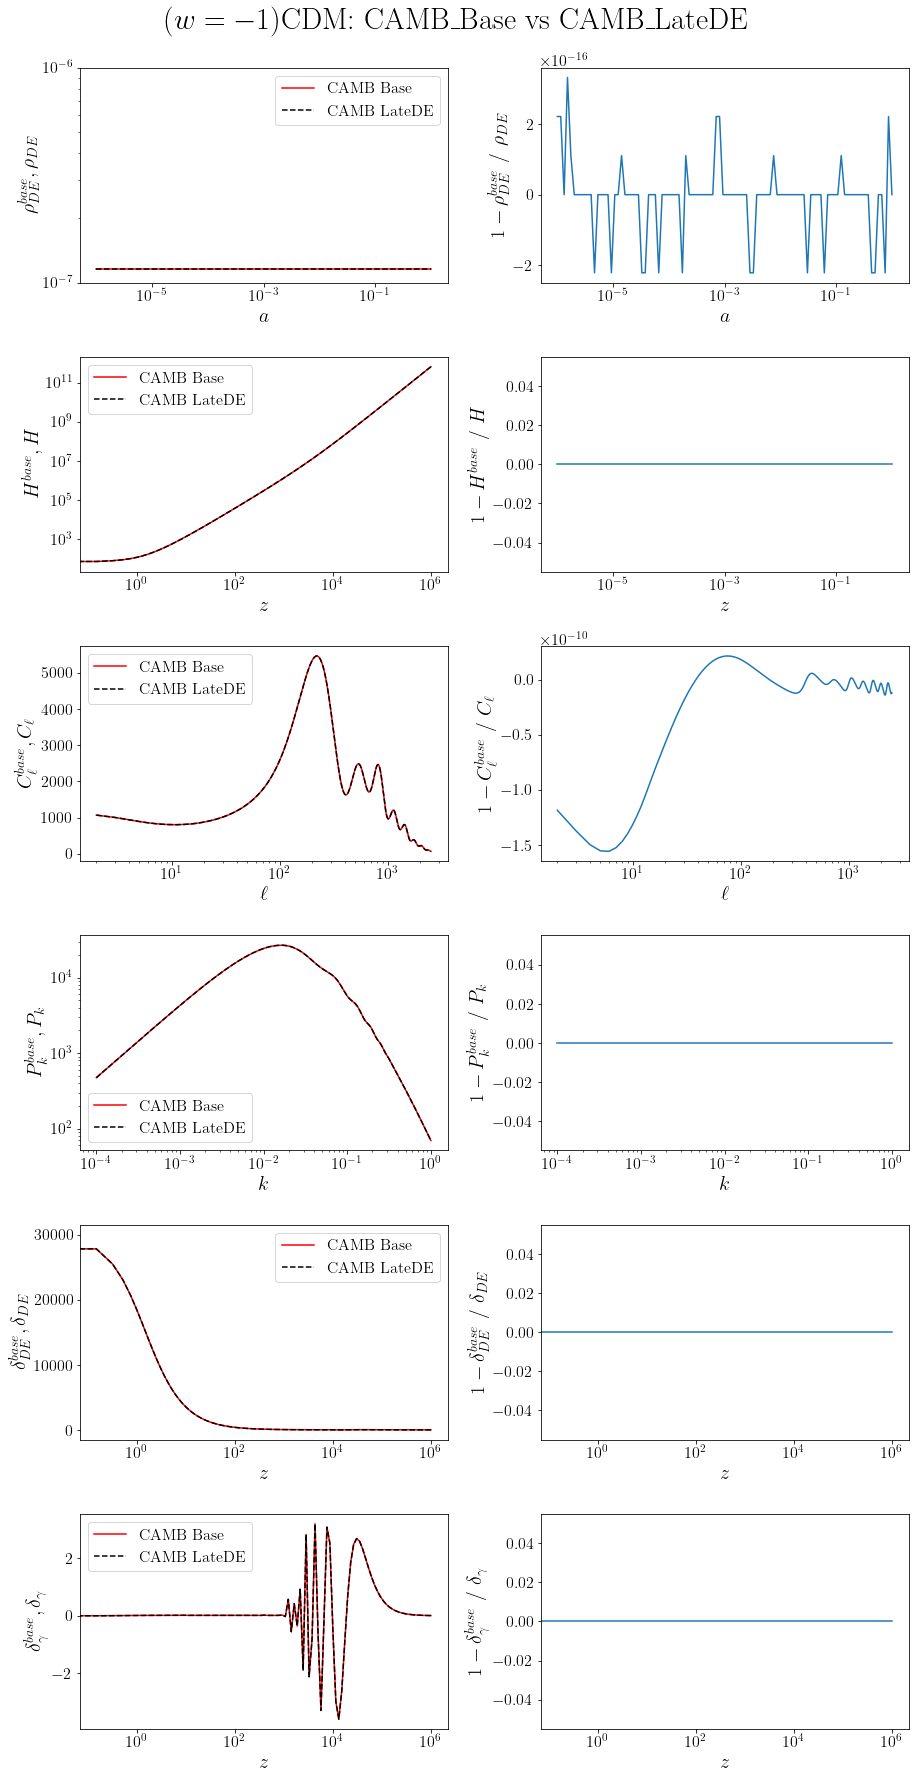

In [4]:
rows = 6

# DE energy density
plt.subplot(rows, 2, 1)
plt.loglog(scale_factor,base_rhode/scale_factor**4,'r',label='CAMB Base')
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'k--',label='CAMB LateDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{base},\rho_{DE}$',fontsize=font_size)
plt.suptitle(r"$(w = -1)$CDM: CAMB\_Base vs CAMB\_LateDE", fontsize=font_size+10,y=0.99)
plt.legend(loc='best')
plt.subplot(rows, 2, 2)
plt.semilogx(scale_factor,1-base_rhode/latede_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{base}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(rows, 2, 3)
plt.loglog(redshift,base_hubble,'r',label='CAMB Base')
plt.loglog(redshift,latede_hubble,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{base},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows, 2, 4)
plt.semilogx(scale_factor,1-base_hubble/latede_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{base}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(rows,2,5)
plt.semilogx(ells[2:],base_cls[2:],'r',label='CAMB Base')
plt.semilogx(ells[2:],latede_cls[2:],'k--',label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{base},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,6)
plt.semilogx(ells[2:],1-base_cls[2:]/latede_cls[2:],label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{base}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(rows,2,7)
plt.loglog(base_ks,base_pk,'r',label='CAMB Base')
plt.loglog(latede_ks,latede_pk,'k--',label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{base},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,8)
plt.semilogx(base_ks,1-base_pk/latede_pk,label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{base}\,\,/\,\,P_k$',fontsize=font_size)

# DE Perturbation
plt.subplot(rows,2,9)
plt.semilogx(redshift,base_delta_de,'r',label='CAMB Base')
plt.semilogx(redshift,latede_delta_de,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{DE}^{base},\delta_{DE}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,10)
plt.semilogx(redshift,1-base_delta_de/latede_delta_de,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{DE}^{base}\,\,/\,\,\delta_{DE}$',fontsize=font_size)
plt.tight_layout()

# Photon Perturbation
plt.subplot(rows,2,11)
plt.semilogx(redshift,base_delta_photon,'r',label='CAMB Base')
plt.semilogx(redshift,latede_delta_photon,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_\gamma^{base},\delta_\gamma$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,12)
plt.semilogx(redshift,1-base_delta_photon/latede_delta_photon,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_\gamma^{base}\,\,/\,\,\delta_\gamma$',fontsize=font_size)

plt.tight_layout()
plt.savefig("LCDM_CAMBBase_vs_CAMBLateDE.pdf")
plt.show()

### Section 2 - $w$ CDM: CAMBBase vs CAMBLateDE

In [1]:
# CAMB Base
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBBase/camb


In [2]:
base_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            w = -0.8,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

base_results = camb.get_results(base_cosmology)

rho_de = base_results.get_background_densities(scale_factor)['de']
hubble = base_results.hubble_parameter(redshift)
cls = base_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = base_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = base_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = base_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBBase/docs/base_w_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBBase/docs/base_w_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBBase/docs/base_w_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBBase/docs/base_w_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBBase/docs/base_w_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 1, w0 = -0.8,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = latede_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [5]:
# Comparing CAMBBase with CAMBLateDE
import numpy as np
import matplotlib.pyplot as plt
font_size=20

path = '/home/grads/data/Diogo/'

base_background = np.genfromtxt(path+'CAMBBase/docs/base_w_background.txt',unpack=True)
base_cls = np.genfromtxt(path+'CAMBBase/docs/base_w_cls.txt',unpack=True)
base_ks = np.genfromtxt(path+'CAMBBase/docs/base_w_ks.txt',unpack=True)
base_pk = np.genfromtxt(path+'CAMBBase/docs/base_w_pk.txt',unpack=True)
base_perturbations = np.genfromtxt(path+'CAMBBase/docs/base_w_perturbations.txt',unpack=True)

latede_background = np.genfromtxt(path+'CAMBLateDE/docs/latede_w_background.txt',unpack=True)
latede_cls = np.genfromtxt(path+'CAMBLateDE/docs/latede_w_cls.txt',unpack=True)
latede_ks = np.genfromtxt(path+'CAMBLateDE/docs/latede_w_ks.txt',unpack=True)
latede_pk = np.genfromtxt(path+'CAMBLateDE/docs/latede_w_pk.txt',unpack=True)
latede_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/latede_w_perturbations.txt',unpack=True)

In [6]:
# CAMB BASE outputs
scale_factor = base_background[0]
redshift = 1/scale_factor - 1
base_rhode = base_background[1]
base_hubble = base_background[2]
base_delta_de = base_perturbations[0]
base_delta_photon = base_perturbations[1]
base_delta_cdm = base_perturbations[2]
ells = [i for i in range(len(base_cls))]

# CAMB LATEDE outputs
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]
latede_delta_de = latede_perturbations[0]
latede_delta_photon = latede_perturbations[1]
latede_delta_cdm = latede_perturbations[2]

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,30.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

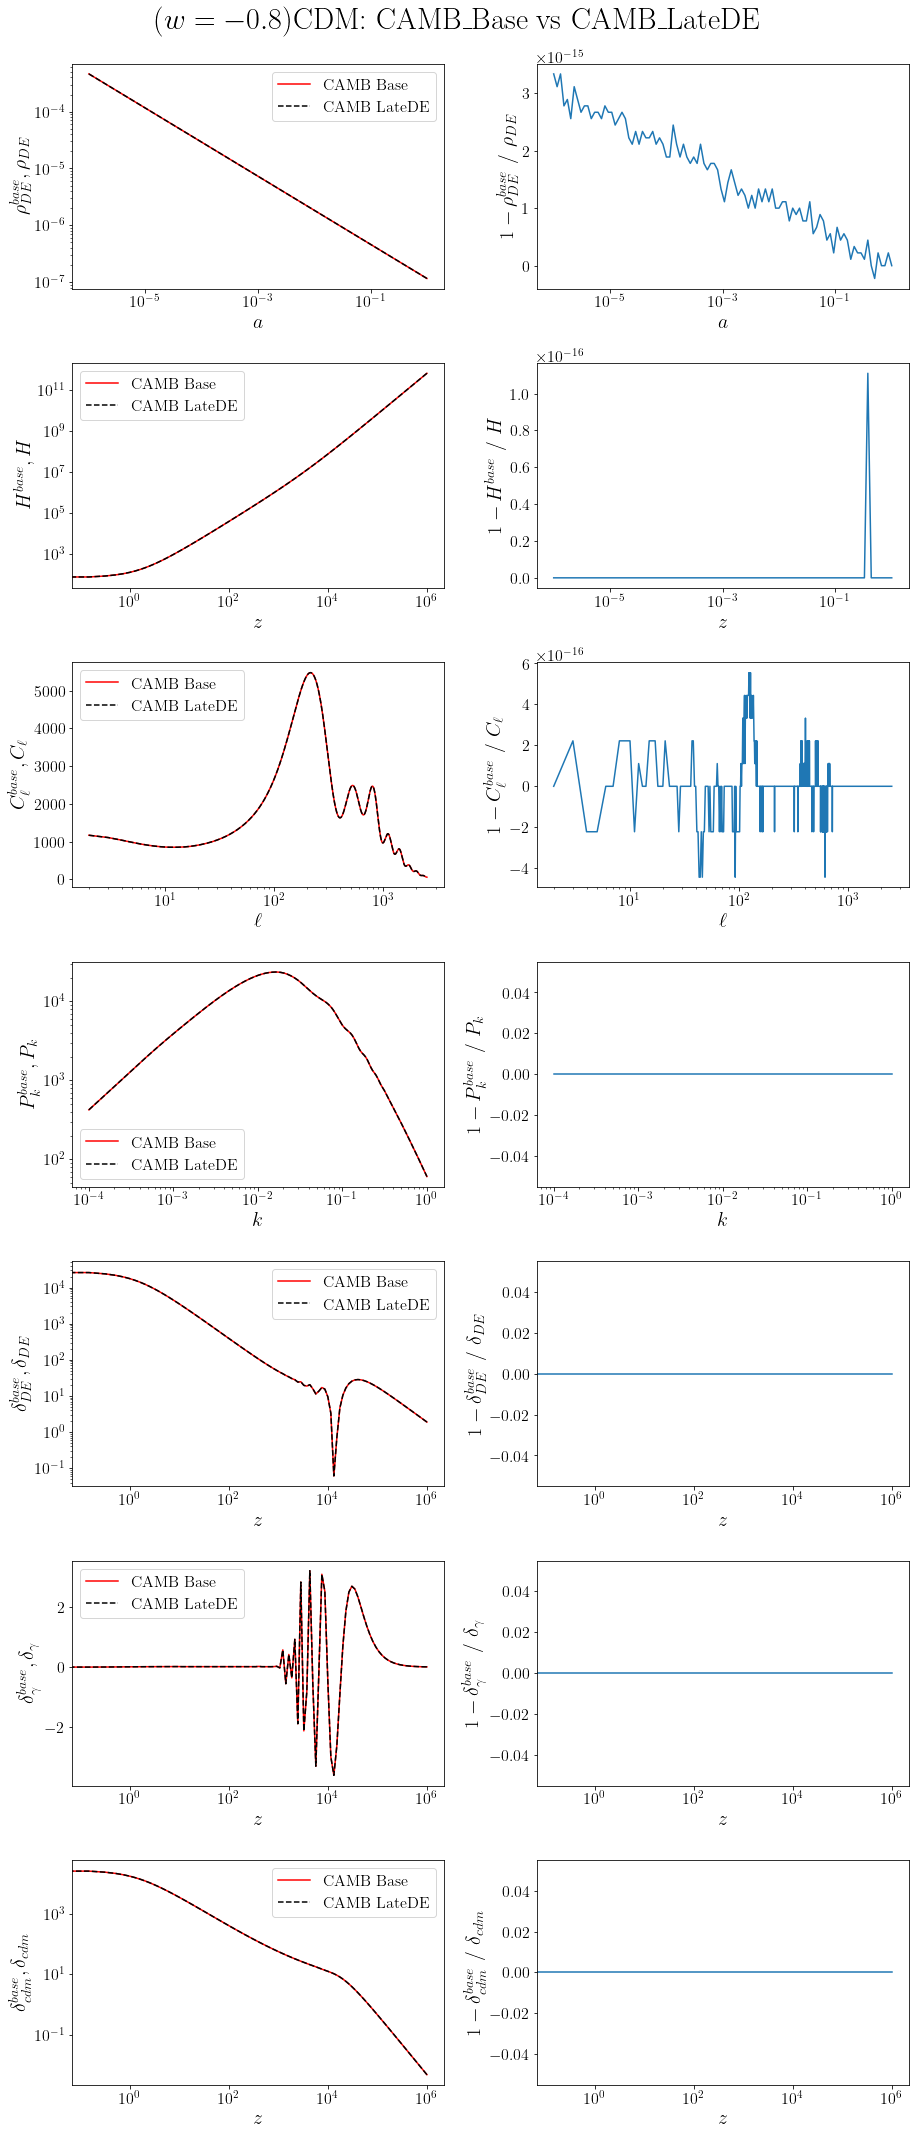

In [8]:
rows = 7

# DE energy density
plt.subplot(rows, 2, 1)
plt.loglog(scale_factor,base_rhode/scale_factor**4,'r',label='CAMB Base')
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'k--',label='CAMB LateDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{base},\rho_{DE}$',fontsize=font_size)
plt.suptitle(r"$(w = -0.8)$CDM: CAMB\_Base vs CAMB\_LateDE",fontsize=font_size+10,y=.99)

plt.legend(loc='best')
plt.subplot(rows, 2, 2)
plt.semilogx(scale_factor,1-base_rhode/latede_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{base}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(rows, 2, 3)
plt.loglog(redshift,base_hubble,'r',label='CAMB Base')
plt.loglog(redshift,latede_hubble,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{base},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows, 2, 4)
plt.semilogx(scale_factor,1-base_hubble/latede_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{base}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(rows,2,5)
plt.semilogx(ells[2:],base_cls[2:],'r',label='CAMB Base')
plt.semilogx(ells[2:],latede_cls[2:],'k--',label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{base},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,6)
plt.semilogx(ells[2:],1-base_cls[2:]/latede_cls[2:],label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{base}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(rows,2,7)
plt.loglog(base_ks,base_pk,'r',label='CAMB Base')
plt.loglog(latede_ks,latede_pk,'k--',label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{base},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,8)
plt.semilogx(base_ks,1-base_pk/latede_pk,label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{base}\,\,/\,\,P_k$',fontsize=font_size)

# DE Perturbation
plt.subplot(rows,2,9)
plt.loglog(redshift,base_delta_de,'r',label='CAMB Base')
plt.loglog(redshift,latede_delta_de,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{DE}^{base},\delta_{DE}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,10)
plt.semilogx(redshift,1-base_delta_de/latede_delta_de,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{DE}^{base}\,\,/\,\,\delta_{DE}$',fontsize=font_size)
plt.tight_layout()

# Photon Perturbation
plt.subplot(rows,2,11)
plt.semilogx(redshift,base_delta_photon,'r',label='CAMB Base')
plt.semilogx(redshift,latede_delta_photon,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_\gamma^{base},\delta_\gamma$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,12)
plt.semilogx(redshift,1-base_delta_photon/latede_delta_photon,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_\gamma^{base}\,\,/\,\,\delta_\gamma$',fontsize=font_size)

# CDM Perturbation
plt.subplot(rows,2,13)
plt.loglog(redshift,base_delta_cdm,'r',label='CAMB Base')
plt.loglog(redshift,latede_delta_cdm,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{cdm}^{base},\delta_{cdm}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,14)
plt.semilogx(redshift,1-base_delta_cdm/latede_delta_cdm,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{cdm}^{base}\,\,/\,\,\delta_{cdm}$',fontsize=font_size)
plt.tight_layout()

plt.savefig("wCDM_CAMBBase_vs_CAMBLateDE.pdf")
plt.show()

### Section 3 - $w_0w_a$ CDM: CAMBBase vs CAMBLateDE

In [1]:
# CAMB Base
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBBase/camb


In [2]:
base_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            w = -0.8, wa = -0.4,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

base_results = camb.get_results(base_cosmology)

rho_de = base_results.get_background_densities(scale_factor)['de']
hubble = base_results.hubble_parameter(redshift)
cls = base_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = base_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = base_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = base_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBBase/docs/base_w0wa_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBBase/docs/base_w0wa_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBBase/docs/base_w0wa_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBBase/docs/base_w0wa_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBBase/docs/base_w0wa_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 2, w0 = -0.8, w1 = -0.4,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = latede_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w0wa_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w0wa_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w0wa_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w0wa_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w0wa_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# Comparing CAMBBase with CAMBLateDE
import numpy as np
import matplotlib.pyplot as plt
font_size=20

path = '/home/grads/data/Diogo/'

base_background = np.genfromtxt(path+'CAMBBase/docs/base_w0wa_background.txt',unpack=True)
base_cls = np.genfromtxt(path+'CAMBBase/docs/base_w0wa_cls.txt',unpack=True)
base_ks = np.genfromtxt(path+'CAMBBase/docs/base_w0wa_ks.txt',unpack=True)
base_pk = np.genfromtxt(path+'CAMBBase/docs/base_w0wa_pk.txt',unpack=True)
base_perturbations = np.genfromtxt(path+'CAMBBase/docs/base_w0wa_perturbations.txt',unpack=True)

latede_background = np.genfromtxt(path+'CAMBLateDE/docs/latede_w0wa_background.txt',unpack=True)
latede_cls = np.genfromtxt(path+'CAMBLateDE/docs/latede_w0wa_cls.txt',unpack=True)
latede_ks = np.genfromtxt(path+'CAMBLateDE/docs/latede_w0wa_ks.txt',unpack=True)
latede_pk = np.genfromtxt(path+'CAMBLateDE/docs/latede_w0wa_pk.txt',unpack=True)
latede_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/latede_w0wa_perturbations.txt',unpack=True)

In [2]:
# CAMB BASE outputs
scale_factor = base_background[0]
redshift = 1/scale_factor - 1
base_rhode = base_background[1]
base_hubble = base_background[2]
base_delta_de = base_perturbations[0]
base_delta_photon = base_perturbations[1]
base_delta_cdm = base_perturbations[2]
ells = [i for i in range(len(base_cls))]

# CAMB LATEDE outputs
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]
latede_delta_de = latede_perturbations[0]
latede_delta_photon = latede_perturbations[1]
latede_delta_cdm = latede_perturbations[2]

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,30.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

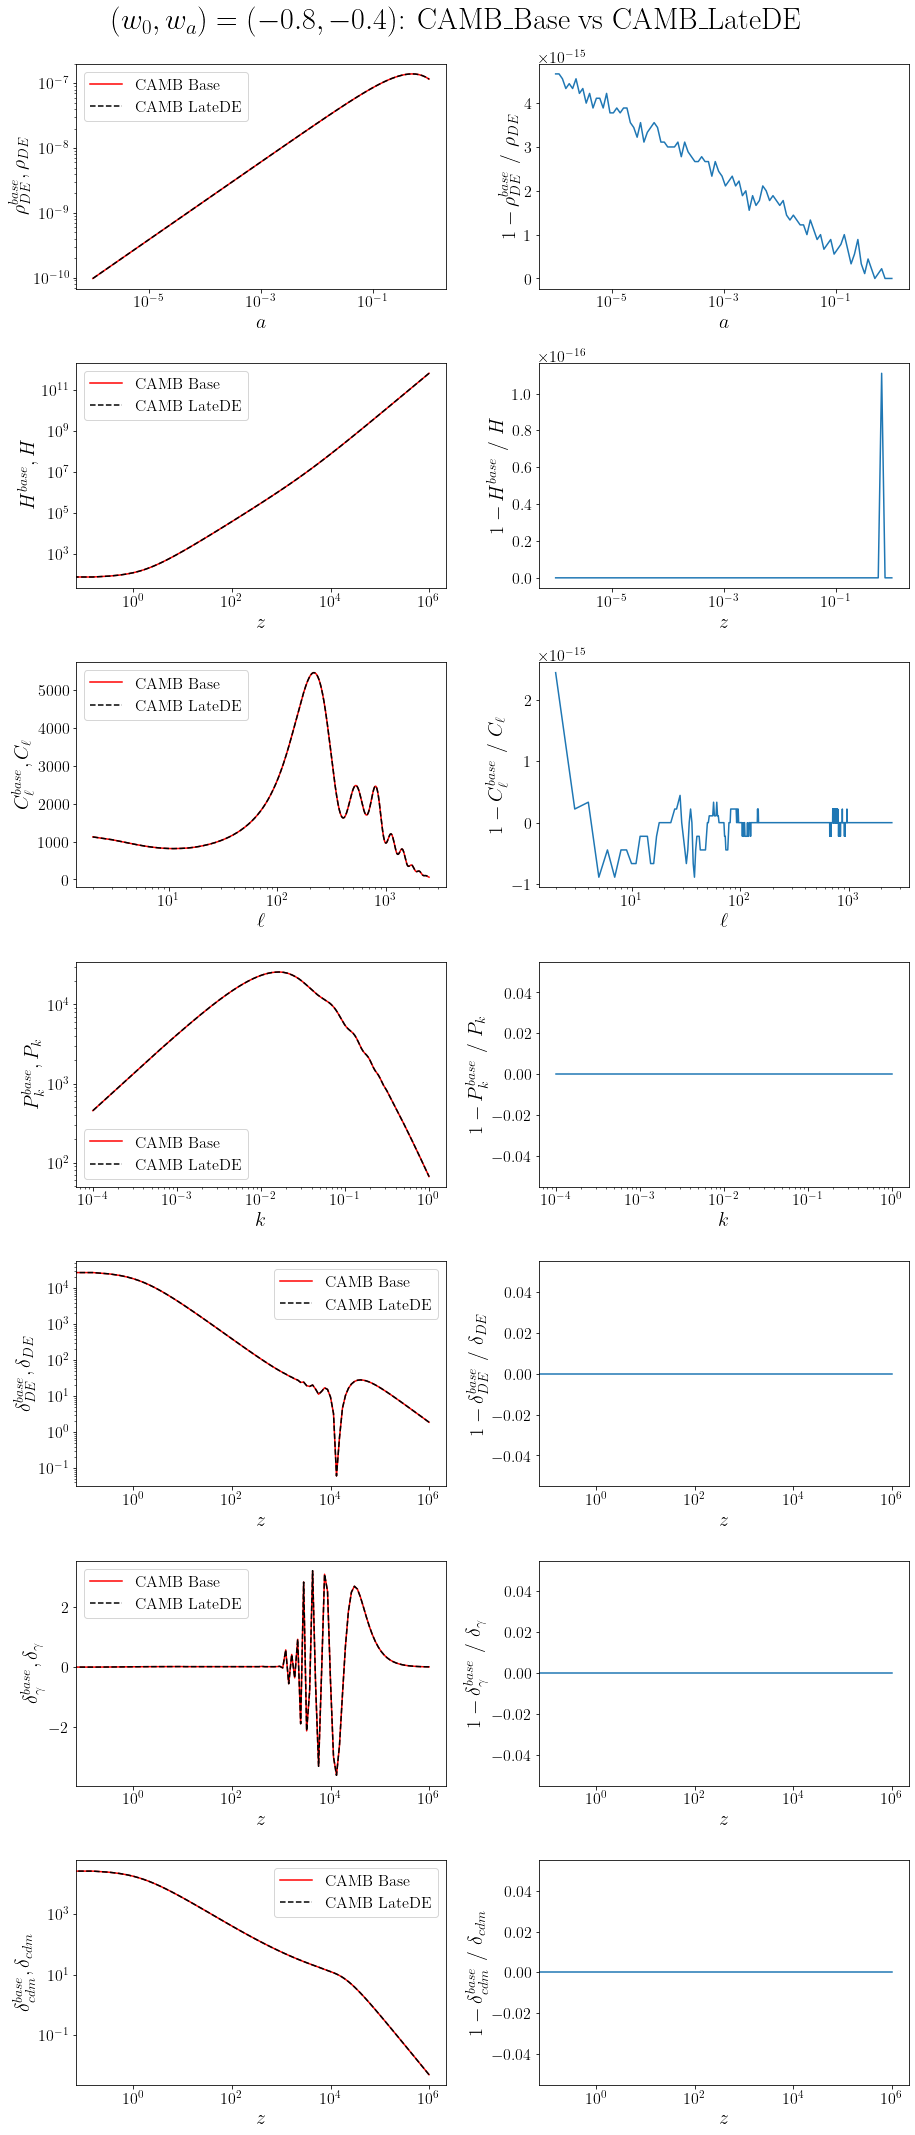

In [6]:
rows = 7

# DE energy density
plt.subplot(rows, 2, 1)
plt.loglog(scale_factor,base_rhode/scale_factor**4,'r',label='CAMB Base')
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'k--',label='CAMB LateDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{base},\rho_{DE}$',fontsize=font_size)
plt.suptitle(r"$(w_0, w_a) = (-0.8, -0.4)$: CAMB\_Base vs CAMB\_LateDE",fontsize=font_size+10,y=.99)

plt.legend(loc='best')
plt.subplot(rows, 2, 2)
plt.semilogx(scale_factor,1-base_rhode/latede_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{base}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(rows, 2, 3)
plt.loglog(redshift,base_hubble,'r',label='CAMB Base')
plt.loglog(redshift,latede_hubble,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{base},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows, 2, 4)
plt.semilogx(scale_factor,1-base_hubble/latede_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{base}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(rows,2,5)
plt.semilogx(ells[2:],base_cls[2:],'r',label='CAMB Base')
plt.semilogx(ells[2:],latede_cls[2:],'k--',label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{base},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,6)
plt.semilogx(ells[2:],1-base_cls[2:]/latede_cls[2:],label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{base}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(rows,2,7)
plt.loglog(base_ks,base_pk,'r',label='CAMB Base')
plt.loglog(latede_ks,latede_pk,'k--',label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{base},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,8)
plt.semilogx(base_ks,1-base_pk/latede_pk,label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{base}\,\,/\,\,P_k$',fontsize=font_size)

# DE Perturbation
plt.subplot(rows,2,9)
plt.loglog(redshift,base_delta_de,'r',label='CAMB Base')
plt.loglog(redshift,latede_delta_de,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{DE}^{base},\delta_{DE}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,10)
plt.semilogx(redshift,1-base_delta_de/latede_delta_de,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{DE}^{base}\,\,/\,\,\delta_{DE}$',fontsize=font_size)
plt.tight_layout()

# Photon Perturbation
plt.subplot(rows,2,11)
plt.semilogx(redshift,base_delta_photon,'r',label='CAMB Base')
plt.semilogx(redshift,latede_delta_photon,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_\gamma^{base},\delta_\gamma$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,12)
plt.semilogx(redshift,1-base_delta_photon/latede_delta_photon,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_\gamma^{base}\,\,/\,\,\delta_\gamma$',fontsize=font_size)

# CDM Perturbation
plt.subplot(rows,2,13)
plt.loglog(redshift,base_delta_cdm,'r',label='CAMB Base')
plt.loglog(redshift,latede_delta_cdm,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{cdm}^{base},\delta_{cdm}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,14)
plt.semilogx(redshift,1-base_delta_cdm/latede_delta_cdm,label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{cdm}^{base}\,\,/\,\,\delta_{cdm}$',fontsize=font_size)
plt.tight_layout()

plt.savefig("w0waCDM_CAMBBase_vs_CAMBLateDE.pdf")
plt.show()

### Section 4 - Bin $w(z)$: CAMBLateDE

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 6,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, w_test = latede_results.get_dark_energy_rho_w(scale_factor)

latede_results = camb.get_results(latede_cosmology)
rho_de = latede_results.get_background_densities(scale_factor)['de']

In [4]:
rho_test, w_test = latede_results.get_dark_energy_rho_w(scale_factor)

(0.0, 7.0)

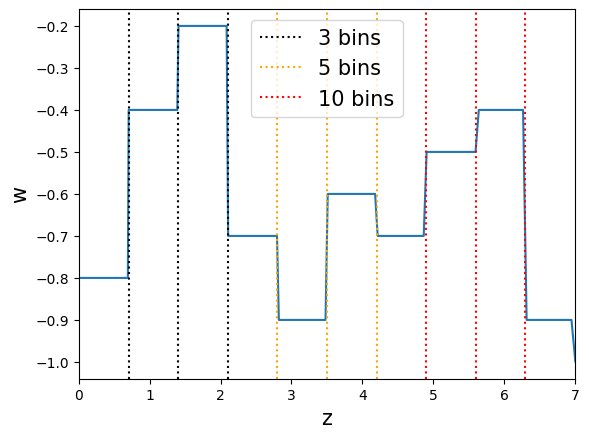

In [5]:
plt.plot(redshift,w_test)
# Model with 3 bins
plt.axvline(x = 0.7,ls=':',c='k',label='3 bins')
plt.axvline(x = 1.4,ls=':',c='k')
plt.axvline(x = 2.1,ls=':',c='k')
# Model with 5 bins
plt.axvline(x = 2.8,ls=':',c='orange',label='5 bins')
plt.axvline(x = 3.5,ls=':',c='orange')
plt.axvline(x = 4.2,ls=':',c='orange')
# Model with 10 bins
plt.axvline(x = 4.9,ls=':',c='red',label='10 bins')
plt.axvline(x = 5.6,ls=':',c='red')
plt.axvline(x = 6.3,ls=':',c='red')
#
plt.xlabel('z',fontsize=15)
plt.ylabel('w',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim(0,7)
# plt.savefig("constant_binned_w.pdf");

### Section 5 - 3 Bin $w(z)$: CAMBLateDE vs CAMBMultiFluidDE

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 4,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = latede_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_3binw_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_3binw_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_3binw_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_3binw_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_3binw_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# CAMB MultiFluidDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/grads/data/Diogo/CAMBMultiFluidDE/camb


In [2]:
multifluidde_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'MultiFluidDE',
                            num_of_components = 1, models = [3,0,0,0],
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9, w10 = -1.0,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            zc = 1000, fde_zc = 0, wn = 1,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, halofit_version = 'casarini',
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

multifluidde_results = camb.get_results(multifluidde_cosmology)

rho_de = multifluidde_results.get_background_densities(scale_factor)['de']
hubble = multifluidde_results.hubble_parameter(redshift)
cls = multifluidde_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = multifluidde_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = multifluidde_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_3binw_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_3binw_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_3binw_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_3binw_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_3binw_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# Comparing CAMBLateDE with CAMBMultiFluidDE
import numpy as np
import matplotlib.pyplot as plt
font_size=20

path = '/home/grads/data/Diogo/'

latede_background = np.genfromtxt(path+'CAMBLateDE/docs/latede_3binw_background.txt',unpack=True)
latede_cls = np.genfromtxt(path+'CAMBLateDE/docs/latede_3binw_cls.txt',unpack=True)
latede_ks = np.genfromtxt(path+'CAMBLateDE/docs/latede_3binw_ks.txt',unpack=True)
latede_pk = np.genfromtxt(path+'CAMBLateDE/docs/latede_3binw_pk.txt',unpack=True)
latede_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/latede_3binw_perturbations.txt',unpack=True)

multifluidde_background = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_3binw_background.txt',unpack=True)
multifluidde_cls = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_3binw_cls.txt',unpack=True)
multifluidde_ks = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_3binw_ks.txt',unpack=True)
multifluidde_pk = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_3binw_pk.txt',unpack=True)
multifluidde_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_3binw_perturbations.txt',unpack=True)

In [2]:
# CAMB LATEDE outputs
scale_factor = latede_background[0]
redshift = 1/scale_factor - 1
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]
latede_delta_de = latede_perturbations[0]
latede_delta_photon = latede_perturbations[1]
latede_delta_cdm = latede_perturbations[2]
ells = [i for i in range(len(latede_cls))]

# CAMB MULTIFLUIDDE outputs
multifluidde_rhode = multifluidde_background[1]
multifluidde_hubble = multifluidde_background[2]
multifluidde_delta_de = multifluidde_perturbations[0]
multifluidde_delta_photon = multifluidde_perturbations[1]
multifluidde_delta_cdm = multifluidde_perturbations[2]

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,30.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

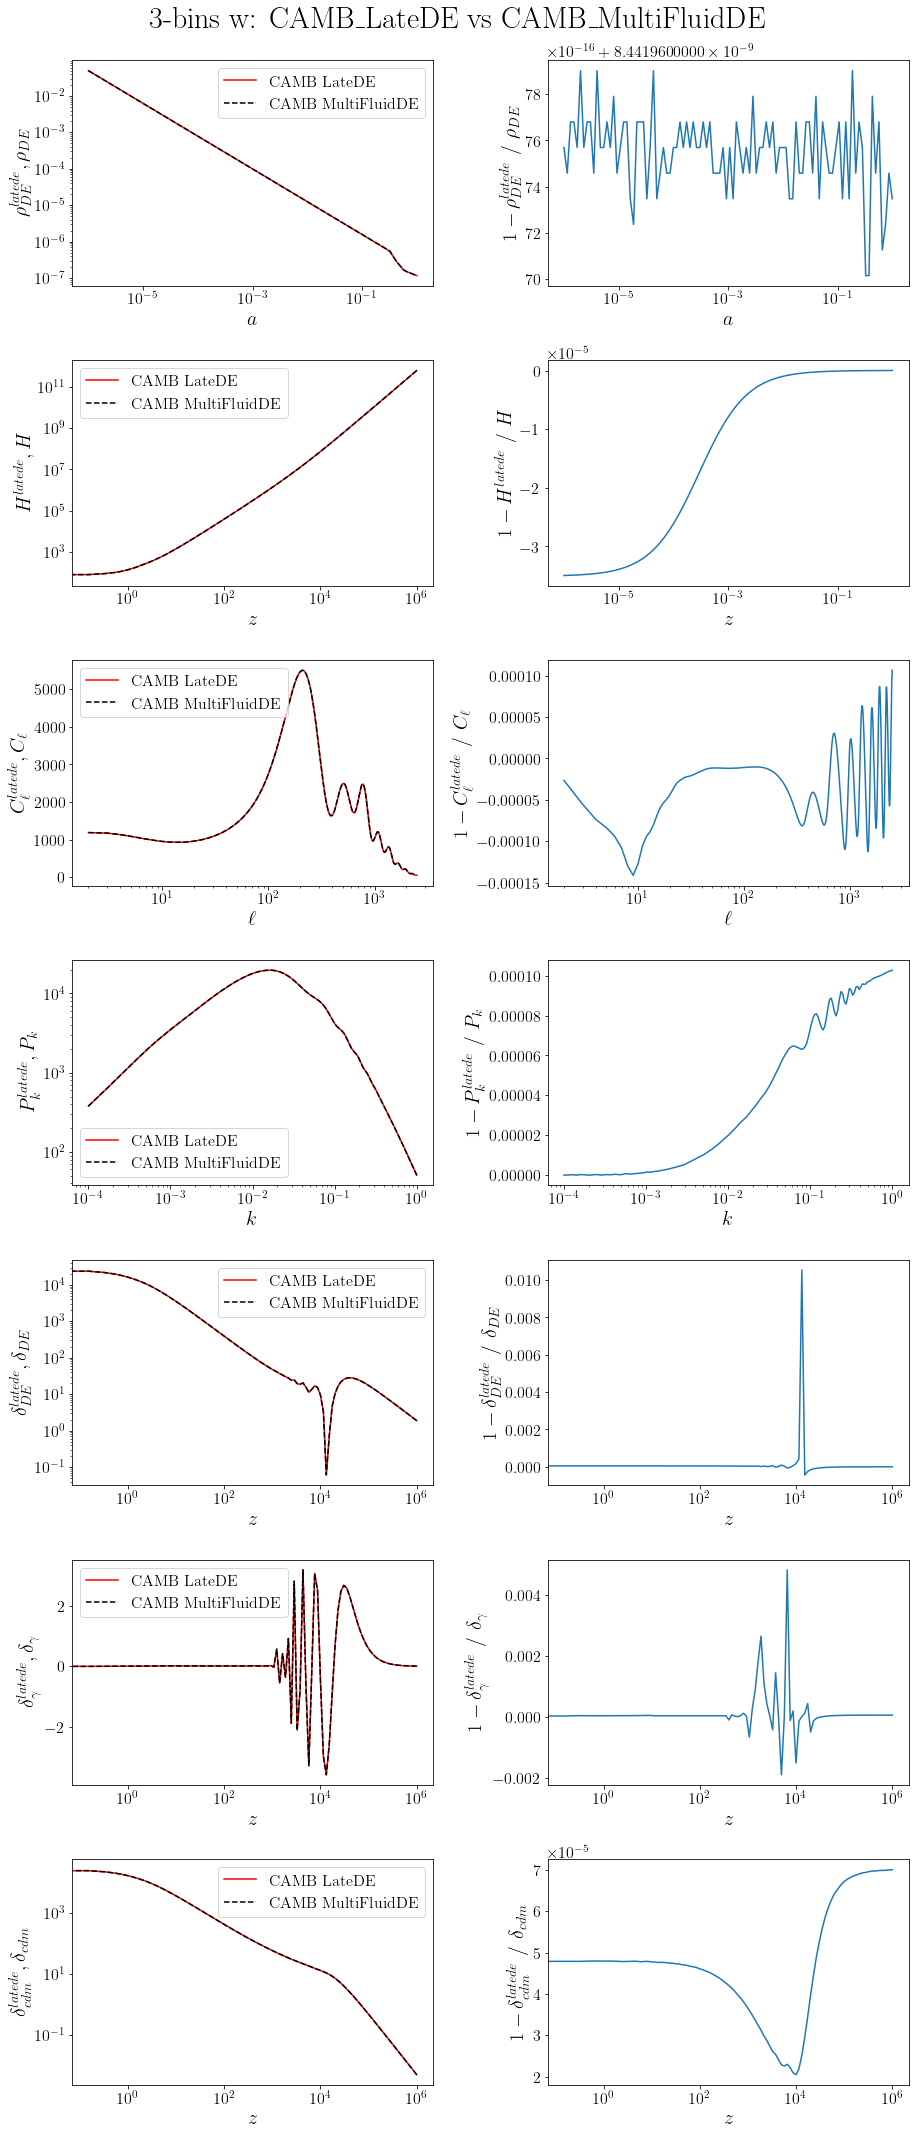

In [6]:
rows = 7

# DE energy density
plt.subplot(rows, 2, 1)
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'r',label='CAMB LateDE')
plt.loglog(scale_factor,multifluidde_rhode/scale_factor**4,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{latede},\rho_{DE}$',fontsize=font_size)
plt.suptitle("3-bins w: CAMB\_LateDE vs CAMB\_MultiFluidDE",fontsize=font_size+10,y=.99)

plt.legend(loc='best')
plt.subplot(rows, 2, 2)
plt.semilogx(scale_factor,1-latede_rhode/multifluidde_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{latede}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(rows, 2, 3)
plt.loglog(redshift,latede_hubble,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_hubble,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{latede},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows, 2, 4)
plt.semilogx(scale_factor,1-latede_hubble/multifluidde_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{latede}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(rows,2,5)
plt.semilogx(ells[2:],latede_cls[2:],'r',label='CAMB LateDE')
plt.semilogx(ells[2:],multifluidde_cls[2:],'k--',label='CAMB MultiFluidDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{latede},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,6)
plt.semilogx(ells[2:],1-latede_cls[2:]/multifluidde_cls[2:])
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{latede}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(rows,2,7)
plt.loglog(latede_ks,latede_pk,'r',label='CAMB LateDE')
plt.loglog(latede_ks,multifluidde_pk,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{latede},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,8)
plt.semilogx(latede_ks,1-latede_pk/multifluidde_pk)
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{latede}\,\,/\,\,P_k$',fontsize=font_size)

# DE Perturbation
plt.subplot(rows,2,9)
plt.loglog(redshift,latede_delta_de,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_delta_de,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{DE}^{latede},\delta_{DE}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,10)
plt.semilogx(redshift,1-latede_delta_de/multifluidde_delta_de)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{DE}^{latede}\,\,/\,\,\delta_{DE}$',fontsize=font_size)
plt.tight_layout()

# Photon Perturbation
plt.subplot(rows,2,11)
plt.semilogx(redshift,latede_delta_photon,'r',label='CAMB LateDE')
plt.semilogx(redshift,multifluidde_delta_photon,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_\gamma^{latede},\delta_\gamma$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,12)
plt.semilogx(redshift,1-latede_delta_photon/multifluidde_delta_photon)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_\gamma^{latede}\,\,/\,\,\delta_\gamma$',fontsize=font_size)

# CDM Perturbation
plt.subplot(rows,2,13)
plt.loglog(redshift,latede_delta_cdm,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_delta_cdm,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{cdm}^{latede},\delta_{cdm}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,14)
plt.semilogx(redshift,1-latede_delta_cdm/multifluidde_delta_cdm)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{cdm}^{latede}\,\,/\,\,\delta_{cdm}$',fontsize=font_size)
plt.tight_layout()

plt.savefig("3binsw_CAMBLateDE_vs_CAMBMultifluidDE.pdf")
plt.show()

### Section 6 - 5 Bin $w(z)$: CAMBLateDE vs CAMBMultiFluidDE

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 5,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = latede_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_5binw_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_5binw_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_5binw_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_5binw_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_5binw_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# CAMB MultiFluidDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/grads/data/Diogo/CAMBMultiFluidDE/camb


In [2]:
multifluidde_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'MultiFluidDE',
                            num_of_components = 1, models = [4,0,0,0],
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9, w10 = -1.0,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            zc = 1000, fde_zc = 0, wn = 1,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

multifluidde_results = camb.get_results(multifluidde_cosmology)

rho_de = multifluidde_results.get_background_densities(scale_factor)['de']
hubble = multifluidde_results.hubble_parameter(redshift)
cls = multifluidde_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = multifluidde_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = multifluidde_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_5binw_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_5binw_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_5binw_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_5binw_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_5binw_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# Comparing CAMBLateDE with CAMBMultiFluidDE
import numpy as np
import matplotlib.pyplot as plt
font_size=20

path = '/home/grads/data/Diogo/'

latede_background = np.genfromtxt(path+'CAMBLateDE/docs/latede_5binw_background.txt',unpack=True)
latede_cls = np.genfromtxt(path+'CAMBLateDE/docs/latede_5binw_cls.txt',unpack=True)
latede_ks = np.genfromtxt(path+'CAMBLateDE/docs/latede_5binw_ks.txt',unpack=True)
latede_pk = np.genfromtxt(path+'CAMBLateDE/docs/latede_5binw_pk.txt',unpack=True)
latede_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/latede_5binw_perturbations.txt',unpack=True)

multifluidde_background = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_5binw_background.txt',unpack=True)
multifluidde_cls = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_5binw_cls.txt',unpack=True)
multifluidde_ks = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_5binw_ks.txt',unpack=True)
multifluidde_pk = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_5binw_pk.txt',unpack=True)
multifluidde_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_5binw_perturbations.txt',unpack=True)

In [2]:
# CAMB LATEDE outputs
scale_factor = latede_background[0]
redshift = 1/scale_factor - 1
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]
latede_delta_de = latede_perturbations[0]
latede_delta_photon = latede_perturbations[1]
latede_delta_cdm = latede_perturbations[2]
ells = [i for i in range(len(latede_cls))]

# CAMB MULTIFLUIDDE outputs
multifluidde_rhode = multifluidde_background[1]
multifluidde_hubble = multifluidde_background[2]
multifluidde_delta_de = multifluidde_perturbations[0]
multifluidde_delta_photon = multifluidde_perturbations[1]
multifluidde_delta_cdm = multifluidde_perturbations[2]

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,30.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

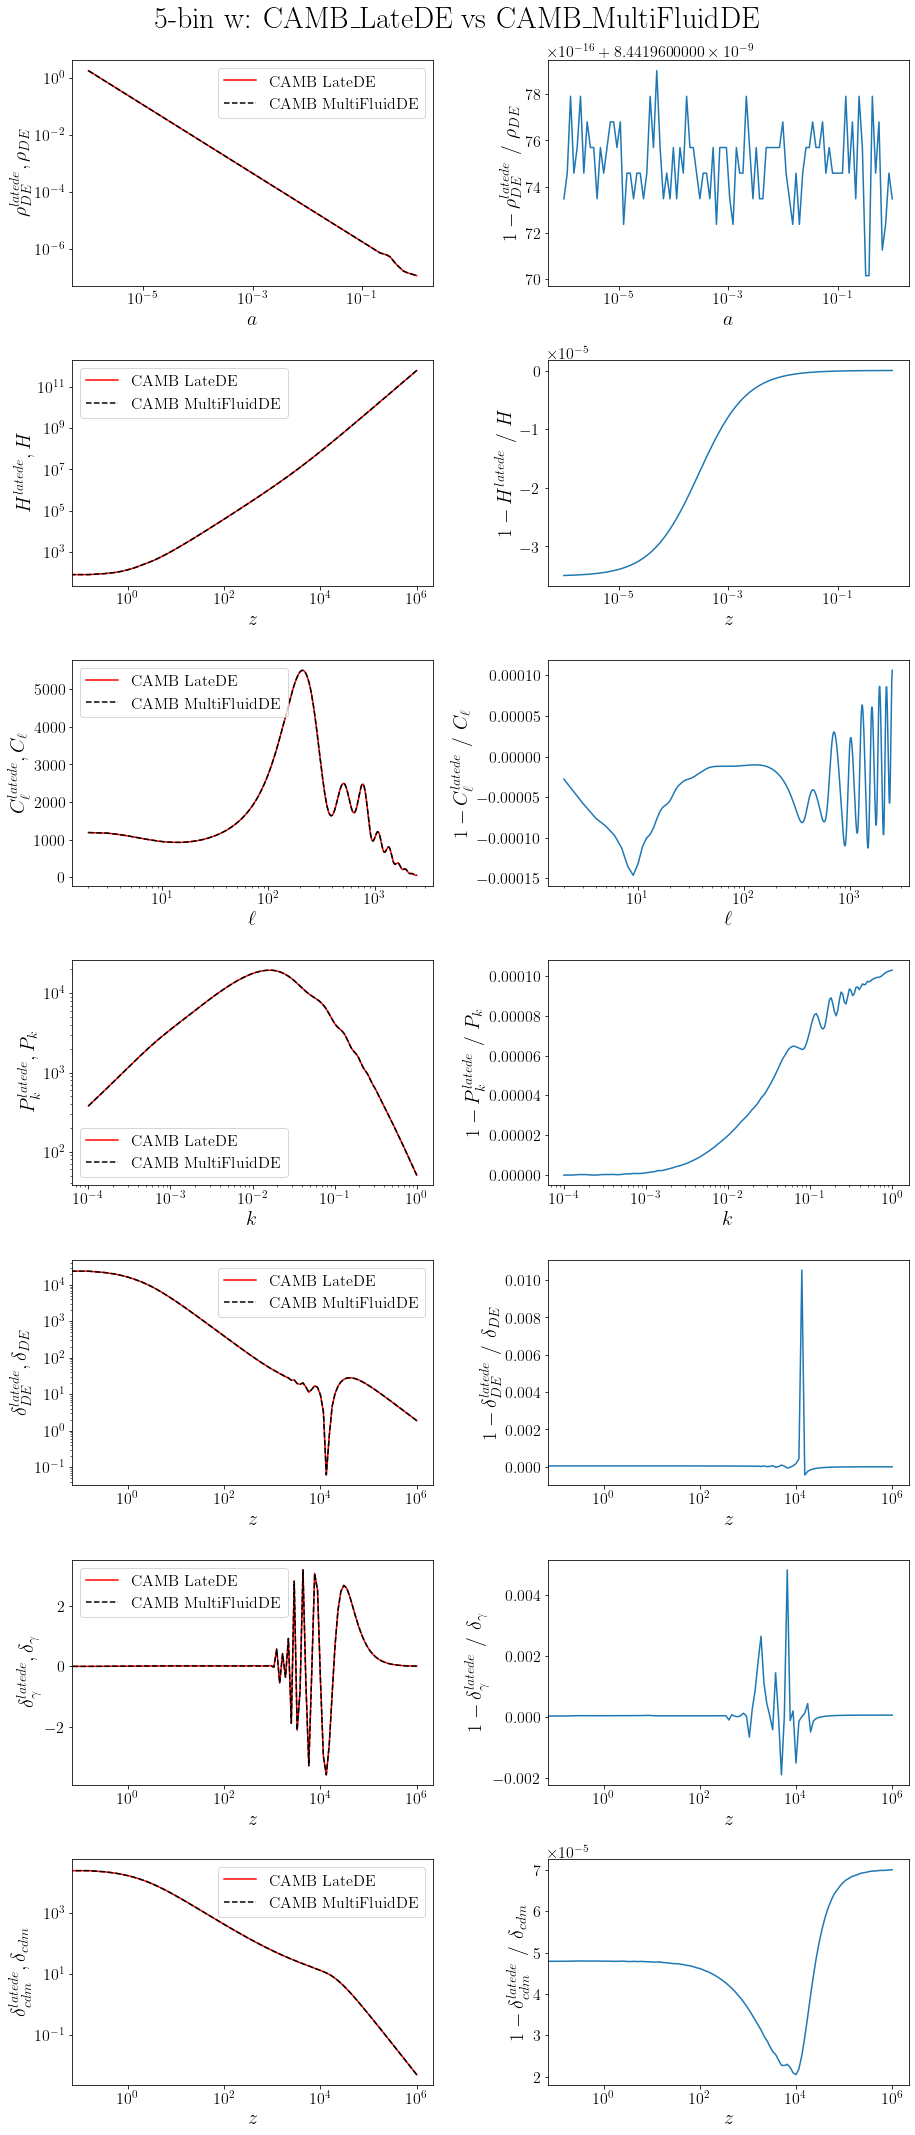

In [4]:
rows = 7

# DE energy density
plt.subplot(rows, 2, 1)
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'r',label='CAMB LateDE')
plt.loglog(scale_factor,multifluidde_rhode/scale_factor**4,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{latede},\rho_{DE}$',fontsize=font_size)
plt.suptitle("5-bin w: CAMB\_LateDE vs CAMB\_MultiFluidDE",fontsize=font_size+10,y=.99)

plt.legend(loc='best')
plt.subplot(rows, 2, 2)
plt.semilogx(scale_factor,1-latede_rhode/multifluidde_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{latede}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(rows, 2, 3)
plt.loglog(redshift,latede_hubble,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_hubble,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{latede},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows, 2, 4)
plt.semilogx(scale_factor,1-latede_hubble/multifluidde_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{latede}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(rows,2,5)
plt.semilogx(ells[2:],latede_cls[2:],'r',label='CAMB LateDE')
plt.semilogx(ells[2:],multifluidde_cls[2:],'k--',label='CAMB MultiFluidDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{latede},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,6)
plt.semilogx(ells[2:],1-latede_cls[2:]/multifluidde_cls[2:])
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{latede}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(rows,2,7)
plt.loglog(latede_ks,latede_pk,'r',label='CAMB LateDE')
plt.loglog(latede_ks,multifluidde_pk,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{latede},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,8)
plt.semilogx(latede_ks,1-latede_pk/multifluidde_pk)
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{latede}\,\,/\,\,P_k$',fontsize=font_size)

# DE Perturbation
plt.subplot(rows,2,9)
plt.loglog(redshift,latede_delta_de,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_delta_de,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{DE}^{latede},\delta_{DE}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,10)
plt.semilogx(redshift,1-latede_delta_de/multifluidde_delta_de)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{DE}^{latede}\,\,/\,\,\delta_{DE}$',fontsize=font_size)
plt.tight_layout()

# Photon Perturbation
plt.subplot(rows,2,11)
plt.semilogx(redshift,latede_delta_photon,'r',label='CAMB LateDE')
plt.semilogx(redshift,multifluidde_delta_photon,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_\gamma^{latede},\delta_\gamma$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,12)
plt.semilogx(redshift,1-latede_delta_photon/multifluidde_delta_photon)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_\gamma^{latede}\,\,/\,\,\delta_\gamma$',fontsize=font_size)

# CDM Perturbation
plt.subplot(rows,2,13)
plt.loglog(redshift,latede_delta_cdm,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_delta_cdm,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{cdm}^{latede},\delta_{cdm}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,14)
plt.semilogx(redshift,1-latede_delta_cdm/multifluidde_delta_cdm)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{cdm}^{latede}\,\,/\,\,\delta_{cdm}$',fontsize=font_size)
plt.tight_layout()

plt.savefig("5binsw_CAMBLateDE_vs_CAMBMultifluidDE.pdf")
plt.show()

### Section 7 - 10 Bin $w(z)$: CAMBLateDE vs CAMBMultiFluidDE

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 6,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = latede_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_10binw_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_10binw_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_10binw_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_10binw_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_10binw_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# CAMB MultiFluidDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /home/grads/data/Diogo/CAMBMultiFluidDE/camb


In [2]:
multifluidde_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'MultiFluidDE',
                            num_of_components = 1, models = [5,0,0,0],
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -0.7, w4 = -0.9,
                            w5 = -0.6, w6 = -0.7, w7 = -0.5, w8 = -0.4, w9 = -0.9, w10 = -1.0,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            zc = 1000, fde_zc = 0, wn = 1,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
k = 0.3

multifluidde_results = camb.get_results(multifluidde_cosmology)

rho_de = multifluidde_results.get_background_densities(scale_factor)['de']
hubble = multifluidde_results.hubble_parameter(redshift)
cls = multifluidde_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = multifluidde_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = multifluidde_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

delta_de = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
delta_photon = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_photon')
delta_cdm = multifluidde_results.get_redshift_evolution(k, redshift, 'delta_cdm')

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_10binw_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_10binw_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_10binw_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_10binw_pk.txt'
filename_perturbations = '/home/grads/data/Diogo/CAMBLateDE/docs/multifluidde_10binw_perturbations.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)
np.savetxt(filename_perturbations,np.transpose([delta_de.flatten(),\
                                                delta_photon.flatten(),\
                                                delta_cdm.flatten()]))

In [1]:
# Comparing CAMBLateDE with CAMBMultiFluidDE
import numpy as np
import matplotlib.pyplot as plt
font_size=20

path = '/home/grads/data/Diogo/'

latede_background = np.genfromtxt(path+'CAMBLateDE/docs/latede_10binw_background.txt',unpack=True)
latede_cls = np.genfromtxt(path+'CAMBLateDE/docs/latede_10binw_cls.txt',unpack=True)
latede_ks = np.genfromtxt(path+'CAMBLateDE/docs/latede_10binw_ks.txt',unpack=True)
latede_pk = np.genfromtxt(path+'CAMBLateDE/docs/latede_10binw_pk.txt',unpack=True)
latede_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/latede_10binw_perturbations.txt',unpack=True)

multifluidde_background = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_10binw_background.txt',unpack=True)
multifluidde_cls = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_10binw_cls.txt',unpack=True)
multifluidde_ks = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_10binw_ks.txt',unpack=True)
multifluidde_pk = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_10binw_pk.txt',unpack=True)
multifluidde_perturbations = np.genfromtxt(path+'CAMBLateDE/docs/multifluidde_10binw_perturbations.txt',unpack=True)

In [2]:
# CAMB LATEDE outputs
scale_factor = latede_background[0]
redshift = 1/scale_factor - 1
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]
latede_delta_de = latede_perturbations[0]
latede_delta_photon = latede_perturbations[1]
latede_delta_cdm = latede_perturbations[2]
ells = [i for i in range(len(latede_cls))]

# CAMB MULTIFLUIDDE outputs
multifluidde_rhode = multifluidde_background[1]
multifluidde_hubble = multifluidde_background[2]
multifluidde_delta_de = multifluidde_perturbations[0]
multifluidde_delta_photon = multifluidde_perturbations[1]
multifluidde_delta_cdm = multifluidde_perturbations[2]

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,30.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

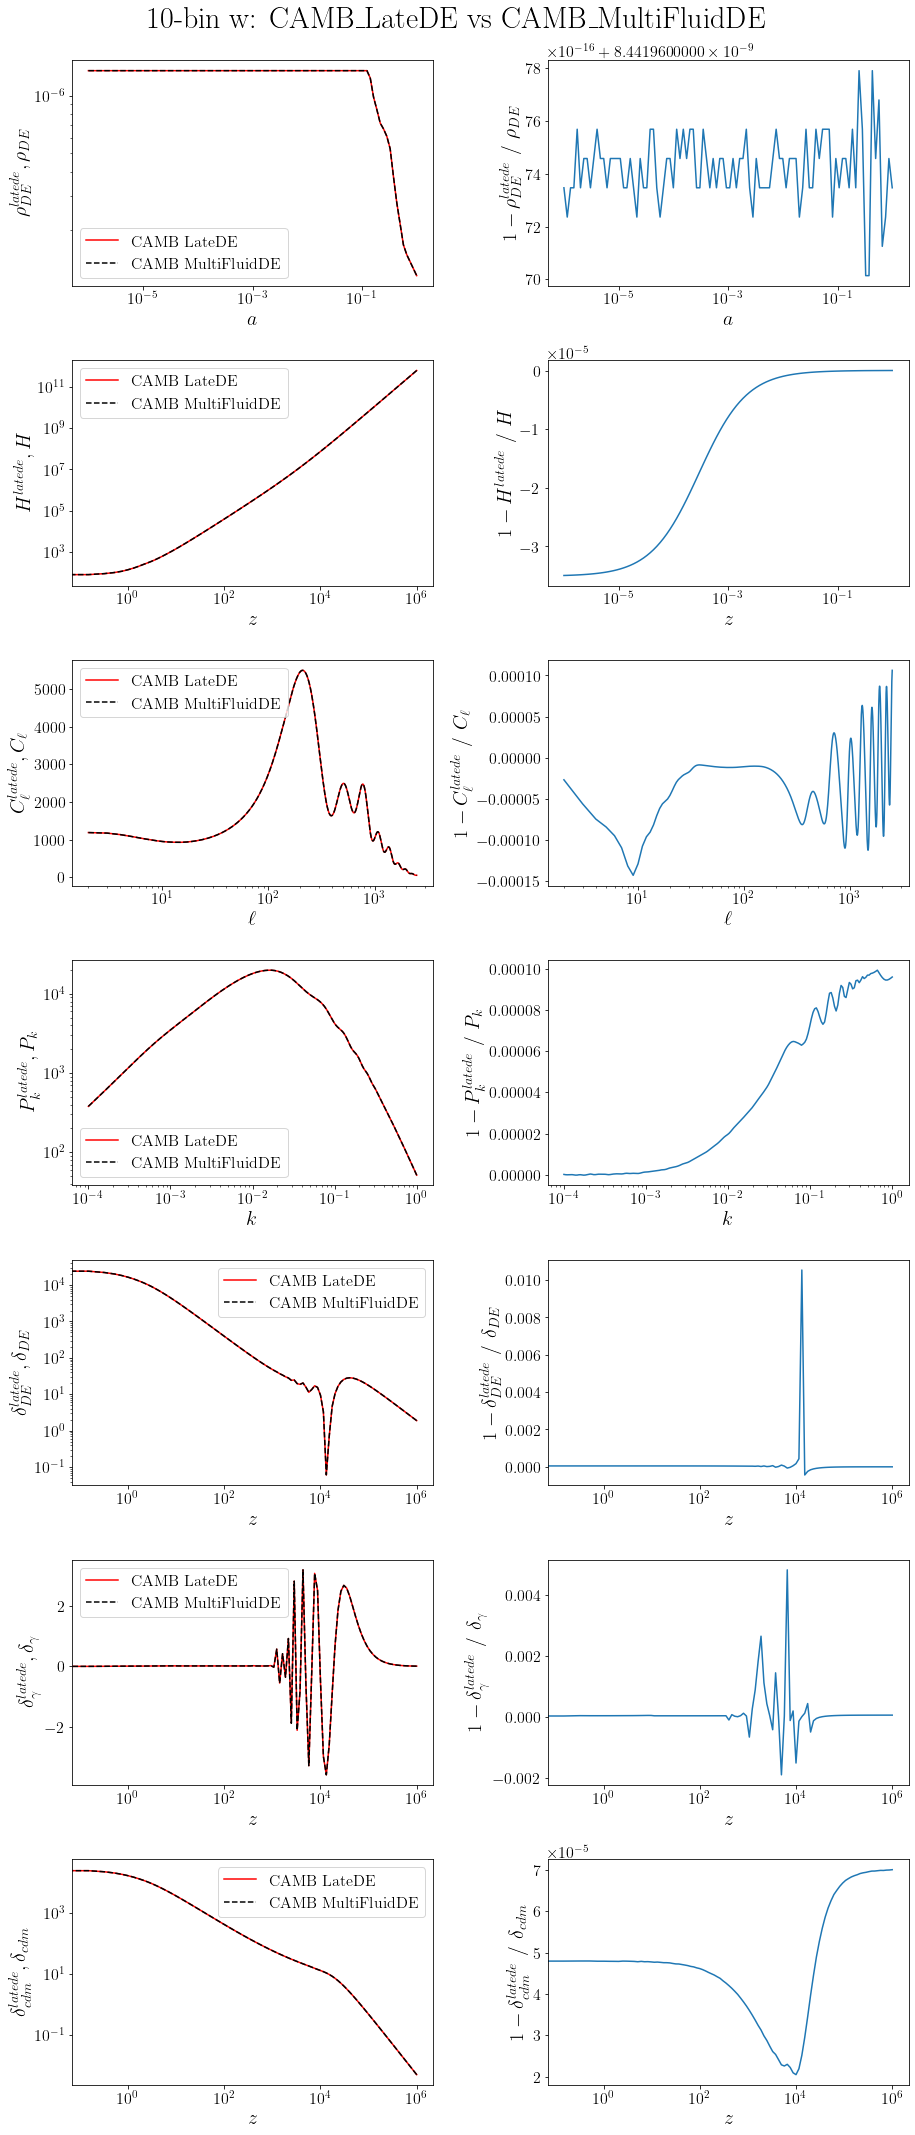

In [4]:
rows = 7

# DE energy density
plt.subplot(rows, 2, 1)
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'r',label='CAMB LateDE')
plt.loglog(scale_factor,multifluidde_rhode/scale_factor**4,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{latede},\rho_{DE}$',fontsize=font_size)
plt.suptitle("10-bin w: CAMB\_LateDE vs CAMB\_MultiFluidDE",fontsize=font_size+10,y=.99)

plt.legend(loc='best')
plt.subplot(rows, 2, 2)
plt.semilogx(scale_factor,1-latede_rhode/multifluidde_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{latede}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(rows, 2, 3)
plt.loglog(redshift,latede_hubble,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_hubble,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{latede},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows, 2, 4)
plt.semilogx(scale_factor,1-latede_hubble/multifluidde_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{latede}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(rows,2,5)
plt.semilogx(ells[2:],latede_cls[2:],'r',label='CAMB LateDE')
plt.semilogx(ells[2:],multifluidde_cls[2:],'k--',label='CAMB MultiFluidDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{latede},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,6)
plt.semilogx(ells[2:],1-latede_cls[2:]/multifluidde_cls[2:])
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{latede}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(rows,2,7)
plt.loglog(latede_ks,latede_pk,'r',label='CAMB LateDE')
plt.loglog(latede_ks,multifluidde_pk,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{latede},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,8)
plt.semilogx(latede_ks,1-latede_pk/multifluidde_pk)
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{latede}\,\,/\,\,P_k$',fontsize=font_size)

# DE Perturbation
plt.subplot(rows,2,9)
plt.loglog(redshift,latede_delta_de,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_delta_de,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{DE}^{latede},\delta_{DE}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,10)
plt.semilogx(redshift,1-latede_delta_de/multifluidde_delta_de)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{DE}^{latede}\,\,/\,\,\delta_{DE}$',fontsize=font_size)
plt.tight_layout()

# Photon Perturbation
plt.subplot(rows,2,11)
plt.semilogx(redshift,latede_delta_photon,'r',label='CAMB LateDE')
plt.semilogx(redshift,multifluidde_delta_photon,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_\gamma^{latede},\delta_\gamma$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,12)
plt.semilogx(redshift,1-latede_delta_photon/multifluidde_delta_photon)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_\gamma^{latede}\,\,/\,\,\delta_\gamma$',fontsize=font_size)

# CDM Perturbation
plt.subplot(rows,2,13)
plt.loglog(redshift,latede_delta_cdm,'r',label='CAMB LateDE')
plt.loglog(redshift,multifluidde_delta_cdm,'k--',label='CAMB MultiFluidDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$\delta_{cdm}^{latede},\delta_{cdm}$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(rows,2,14)
plt.semilogx(redshift,1-latede_delta_cdm/multifluidde_delta_cdm)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-\delta_{cdm}^{latede}\,\,/\,\,\delta_{cdm}$',fontsize=font_size)
plt.tight_layout()

plt.savefig("10binsw_CAMBLateDE_vs_CAMBMultifluidDE.pdf")
plt.show()

### Section 8a - Linear $w(z)$: 2 bins - CAMBLateDE

In [7]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [8]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [9]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, linear_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
linear_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

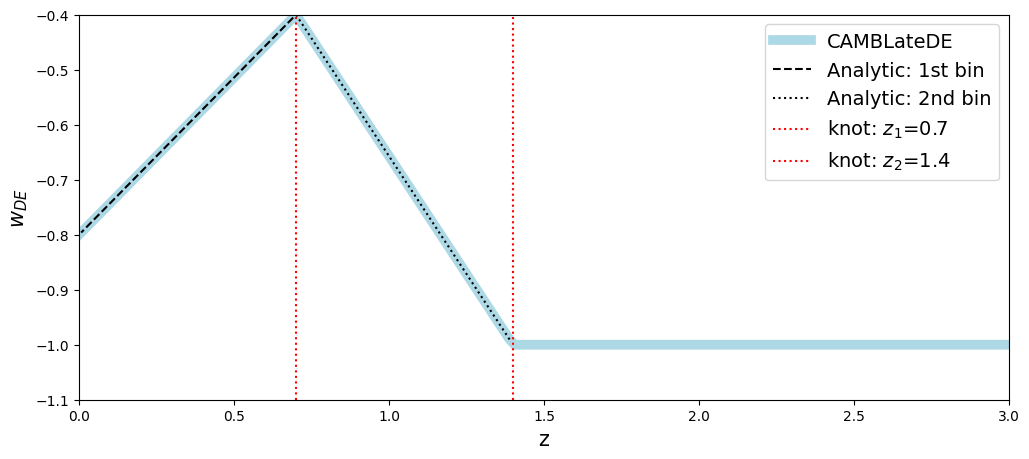

In [10]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3
#
wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z1)
#

w_1st_bin,w_2nd_bin,w_3rd_bin=[],[],[]
redshift1,redshift2,redshift3=[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0))
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1))
    elif (z2<redshift[i]):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2)    

plt.rcParams['figure.figsize'] = [12, 5]      
        
plt.plot(redshift,linear_wde_2bins,color='lightblue',lw=7,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: $w(z)$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=14)
plt.xlim(0,3)
plt.ylim(-1.1,-.4);
# plt.savefig("linear_binned_w_2bins.pdf");

In [11]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1
k = 0.3

latede_results = camb.get_results(latede_cosmology)

linear_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']
latede_hubble = latede_results.hubble_parameter(redshift)
latede_cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
ells = [i for i in range(len(latede_cls))]

latede_ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
latede_pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2][0]

latede_delta_de = latede_results.get_redshift_evolution(k, redshift, 'delta_tot_de')
latede_delta_photon = latede_results.get_redshift_evolution(k, redshift, 'delta_photon')
latede_delta_cdm = latede_results.get_redshift_evolution(k, redshift, 'delta_cdm')

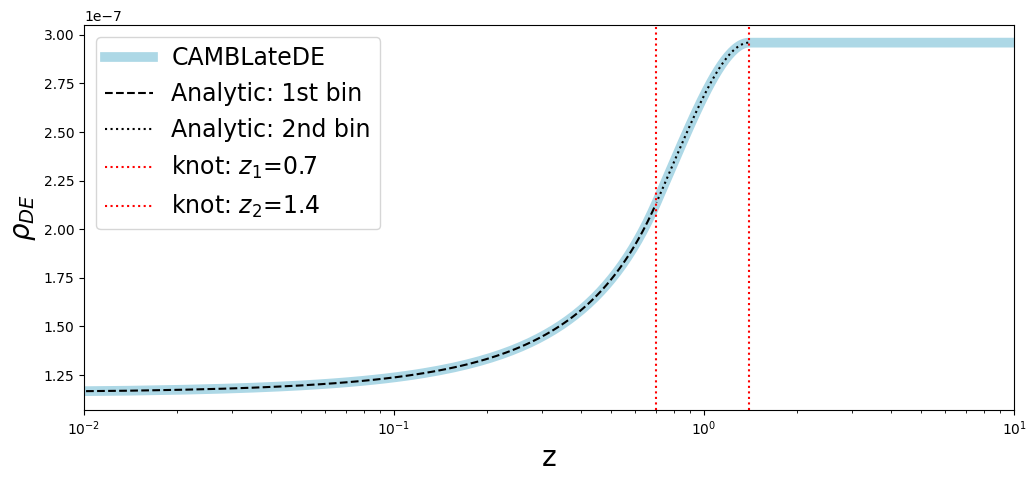

In [12]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin = [], [], []
redshift1, redshift2, redshift3 = [], [], []
scale_factor1, scale_factor2, scale_factor3 = [], [], []

wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z2)

alpha0 = 3*(1+w0-wa0*(1+z0))      
alpha1 = 3*(1+w1-wa1*(1+z1))
alpha2 = 3*(1+w2-wa2*(1+z2))

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        scale_factor1.append(1/(1+z[i]))
        grho_de1 = grho_de_today * \
                                 ((1+z[i])/(1+z0))**alpha0*np.exp(3*wa0*(z[i]-z0))
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        scale_factor2.append(1/(1+z[i]))
        grho_de2 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z[i])/(1+z1))**alpha1*np.exp(3*wa1*(z[i]-z1))
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i]):
        redshift3.append(redshift[i])  
        scale_factor3.append(1/(1+z[i]))
        grho_de3 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z2  )/(1+z1))**alpha1*np.exp(3*wa1*(z2  -z1)) * \
                                 ((1+z[i])/(1+z2))**alpha2*np.exp(3*wa2*(z[i]-z2))
        rho_de_3rd_bin.append(grho_de3)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,linear_rhode_2bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic $\rho_{DE}$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("linear_binned_rhode.pdf");

### Section 8b - Linear $w(z)$: 3 bins - CAMBLateDE

In [13]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [14]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 8,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [15]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, linear_wde_3bins = latede_results.get_dark_energy_rho_w(scale_factor)
linear_rhode_3bins = latede_results.get_background_densities(scale_factor)['de']

(0.0, 3.0)

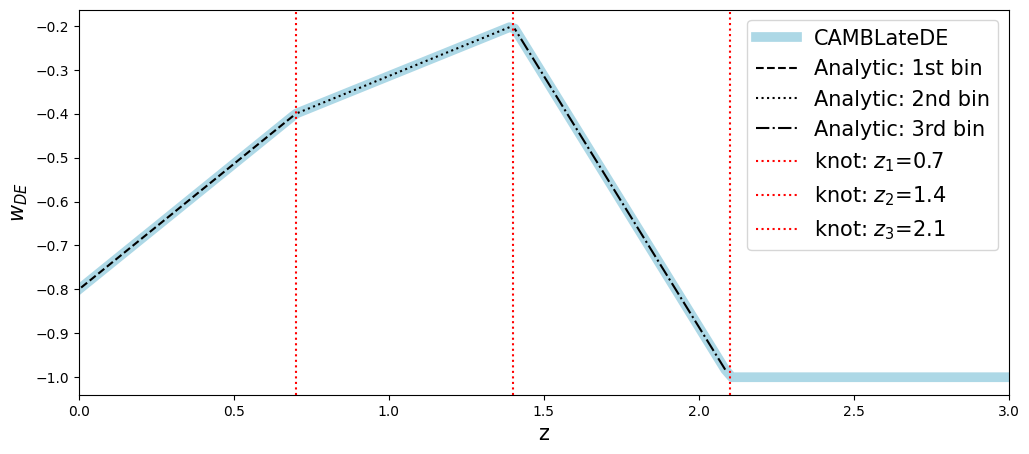

In [16]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
z4 = latede_results.Params.DarkEnergy.z4
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3
w4 = latede_results.Params.DarkEnergy.w4
#
wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z2)
#

w_1st_bin,w_2nd_bin,w_3rd_bin,w_4th_bin=[],[],[],[]
redshift1,redshift2,redshift3,redshift4=[],[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0))
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1))
    elif (z2<redshift[i]<z3):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2 + wa2*(redshift[i]-z2))
    elif (z3<redshift[i]):
        redshift4.append(redshift[i])    
        w_4th_bin.append(w3)        

plt.rcParams['figure.figsize'] = [12, 5]      
        
plt.plot(redshift,linear_wde_3bins,color='lightblue',lw=7,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')
# plt.plot(redshift4,w_4th_bin,ls=':',color='black')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim(0,3)
# plt.ylim(-1.1,-.3);
# plt.savefig("linear_binned_w_3bins.pdf");

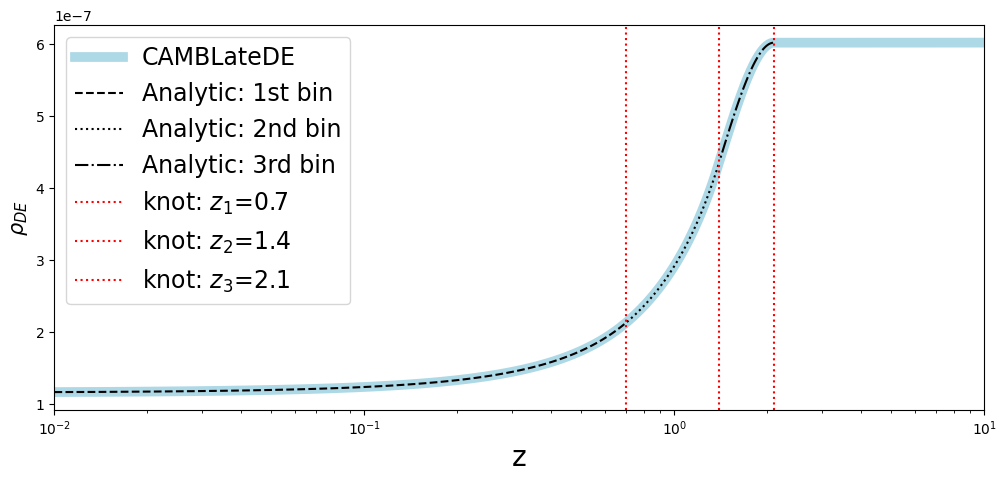

In [17]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin, rho_de_4th_bin = [], [], [], []
redshift1, redshift2, redshift3, redshift4 = [], [], [], []

wa0 = (w1-w0)/(z1-z0)
wa1 = (w2-w1)/(z2-z1)
wa2 = (w3-w2)/(z3-z2)
wa3 = (w4-w3)/(z4-z3)

alpha0 = 3*(1+w0-wa0*(1+z0))      
alpha1 = 3*(1+w1-wa1*(1+z1))
alpha2 = 3*(1+w2-wa2*(1+z2))
alpha3 = 3*(1+w3-wa3*(1+z3))

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        grho_de1 = grho_de_today * \
                                 ((1+z[i])/(1+z0))**alpha0*np.exp(3*wa0*(z[i]-z0))
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        grho_de2 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z[i])/(1+z1))**alpha1*np.exp(3*wa1*(z[i]-z1))
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i] < z3):
        redshift3.append(redshift[i])  
        grho_de3 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z2  )/(1+z1))**alpha1*np.exp(3*wa1*(z2  -z1)) * \
                                 ((1+z[i])/(1+z2))**alpha2*np.exp(3*wa2*(z[i]-z2))
        rho_de_3rd_bin.append(grho_de3)
    elif (z3 < z[i]):
        redshift4.append(redshift[i])  
        grho_de4 = grho_de_today * \
                                 ((1+z1  )/(1+z0))**alpha0*np.exp(3*wa0*(z1  -z0)) * \
                                 ((1+z2  )/(1+z1))**alpha1*np.exp(3*wa1*(z2  -z1)) * \
                                 ((1+z3  )/(1+z2))**alpha2*np.exp(3*wa2*(z3  -z2)) * \
                                 ((1+z[i])/(1+z3))**alpha3*np.exp(3*wa3*(z[i]-z3))
        rho_de_4th_bin.append(grho_de4)        

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,linear_rhode_3bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')
# plt.semilogx(redshift4,rho_de_4th_bin,ls=':',color='black') #,label=r'Analytic: 4th bin'

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=15)
plt.xlim(0.01,10);
# plt.savefig("linear_binned_rhode.pdf");

### Section 9a - Quadratic $w(z)$: 2 bins - CAMBLateDE

In [18]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [19]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 11,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [20]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, quadratic_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
quadratic_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

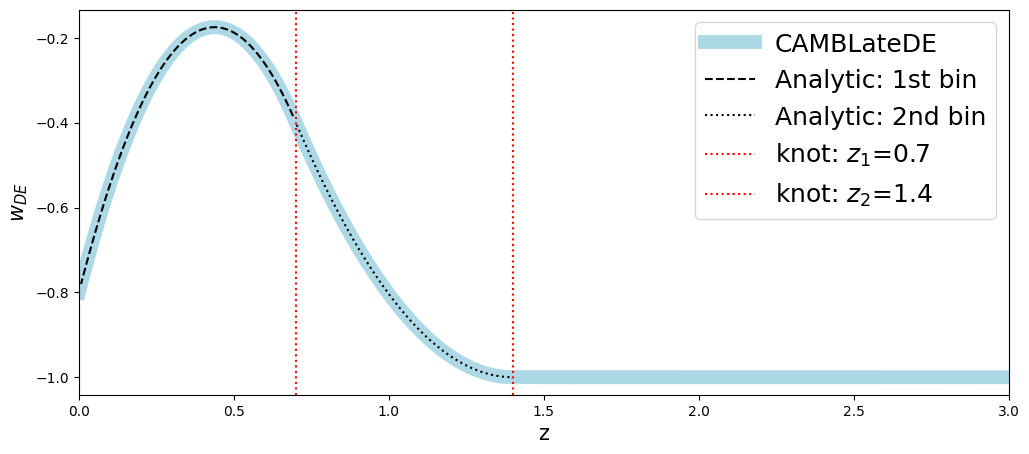

In [21]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_w1 = w1-w0
Delta_z2 = z2-z1
Delta_w2 = w2-w1

# Boundary conditions -see my notes-
wa0  = 2.*(Delta_w1/Delta_z1 - Delta_w2/Delta_z2)
waa0 = -Delta_w1/Delta_z1**2 + 2.*Delta_w2/(Delta_z1*Delta_z2)
wa1  =  2.*Delta_w2/Delta_z2
waa1 =  -Delta_w2/Delta_z2**2
wa2  = 0
waa2 = 0

w_1st_bin,w_2nd_bin,w_3rd_bin=[],[],[]
redshift1,redshift2,redshift3=[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0) + waa0*(redshift[i]-z0)**2)
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1) + waa1*(redshift[i]-z1)**2)
    elif (z2<redshift[i]):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2 + wa2*(redshift[i]-z2) + waa2*(redshift[i]-z2)**2)    

plt.rcParams['figure.figsize'] = [12, 5] 

plt.plot(redshift,quadratic_wde_2bins,color='lightblue',lw=10,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: $w(z)$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=18)
plt.xlim(0,3);
# plt.savefig("quadratic_binned_w.pdf");

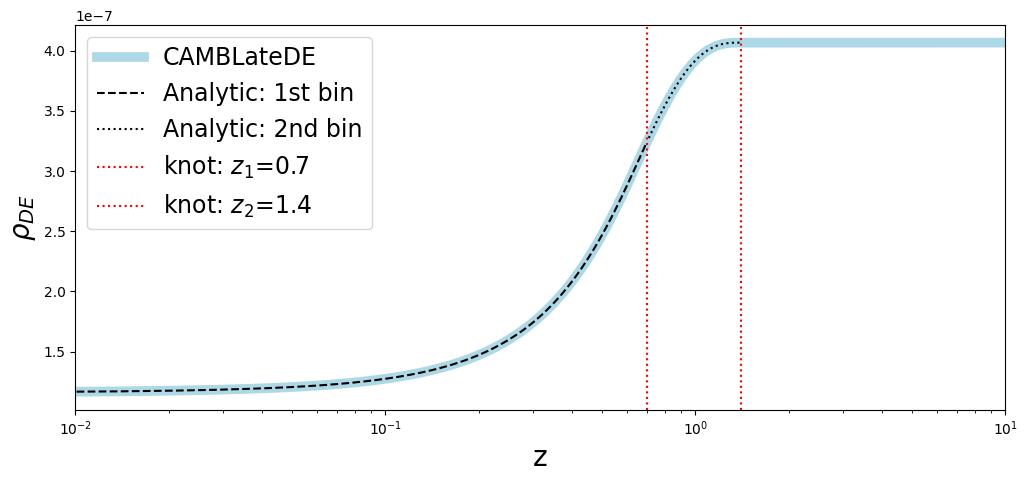

In [22]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin = [], [], []
redshift1, redshift2, redshift3 = [], [], []

wa0  = 2*(Delta_w1/Delta_z1 - Delta_w2/Delta_z2)
waa0 = -Delta_w1/Delta_z1**2 + 2*Delta_w2/(Delta_z1*Delta_z2)
wa1  = 2*Delta_w2/Delta_z2
waa1 = -Delta_w2/Delta_z2**2 
wa2  = 0
waa2 = 0

A00 = 3*(1 + w0 - wa0*z0 + waa0*z0**2)
A10 = 3*(wa0 - 2*waa0*z0)
A20 = 3*waa0

A01 = 3*(1 + w1 - wa1*z1 + waa1*z1**2)
A11 = 3*(wa1 - 2*waa1*z1)
A21 = 3*waa1

A02 = 3*(1 + w2 - wa2*z2 + waa2*z2**2)
A12 = 3*(wa2 - 2*waa2*z2)
A22 = 3*waa2

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        grho_de1 = grho_de_today * \
                   (((1+z[i])/(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z[i]-z0)+A20*(z[i]**2-z0**2)/2)
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        grho_de2 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2   -z0**2)/2) * \
                   (((1+z[i])/(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z[i]-z1)+A21*(z[i]**2 -z1**2)/2)
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i]):
        redshift3.append(redshift[i])  
        grho_de3 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2  -z0**2)/2) * \
                   (((1+z2)  /(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z2  -z1)+A21*(z2**2  -z1**2)/2) * \
                   (((1+z[i])/(1+z2))**(A02-A12+A22))*np.exp((A12-A22)*(z[i]-z2)+A22*(z[i]**2 -z2**2)/2)
        rho_de_3rd_bin.append(grho_de3)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,quadratic_rhode_2bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
# plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic $\rho_{DE}$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("quadratic_binned_rhode.pdf");

### Section 9b - Quadratic $w(z)$: 3 bins - CAMBLateDE

In [23]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [24]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [25]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, quadratic_wde_3bins = latede_results.get_dark_energy_rho_w(scale_factor)
quadratic_rhode_3bins = latede_results.get_background_densities(scale_factor)['de']

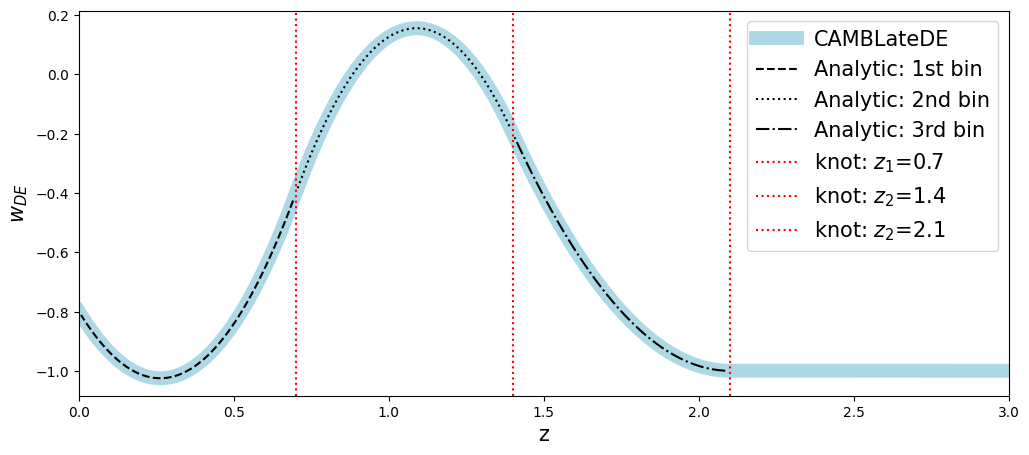

In [26]:
# # Model with 2 bins
z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3
#
w0 = latede_results.Params.DarkEnergy.w0
w1 = latede_results.Params.DarkEnergy.w1
w2 = latede_results.Params.DarkEnergy.w2
w3 = latede_results.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_z2 = z2-z1
Delta_z3 = z3-z2
Delta_w1 = w1-w0
Delta_w2 = w2-w1
Delta_w3 = w3-w2

# Boundary conditions -see my notes-
wa0  = 2.*(Delta_w1/Delta_z1 - Delta_w2/Delta_z2 + Delta_w3/Delta_z3)
waa0 = -Delta_w1/Delta_z1**2 + (2./Delta_z1)*(Delta_w2/Delta_z2 - Delta_w3/Delta_z3)
wa1  = 2.*(Delta_w2/Delta_z2 - Delta_w3/Delta_z3)
waa1 = -Delta_w2/Delta_z2**2 + 2*Delta_w3/(Delta_z2*Delta_z3)
wa2  = 2.*Delta_w3/Delta_z3
waa2 = -Delta_w3/Delta_z3**2
wa3  = 0
waa3 = 0

w_1st_bin,w_2nd_bin,w_3rd_bin=[],[],[]
redshift1,redshift2,redshift3=[],[],[]

for i in np.arange(len(redshift)):
    if (z0<redshift[i]<z1):
        redshift1.append(redshift[i])
        w_1st_bin.append(w0 + wa0*(redshift[i]-z0) + waa0*(redshift[i]-z0)**2)
    elif (z1<redshift[i]<z2):
        redshift2.append(redshift[i])    
        w_2nd_bin.append(w1 + wa1*(redshift[i]-z1) + waa1*(redshift[i]-z1)**2)
    elif (z2<redshift[i]<z3):
        redshift3.append(redshift[i])    
        w_3rd_bin.append(w2 + wa2*(redshift[i]-z2) + waa2*(redshift[i]-z2)**2)    

plt.rcParams['figure.figsize'] = [12, 5] 

plt.plot(redshift,quadratic_wde_3bins,color='lightblue',lw=10,label='CAMBLateDE')
plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_2$={}'.format(z3))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim(0,3);
# plt.savefig("quadratic_binned_w.pdf");

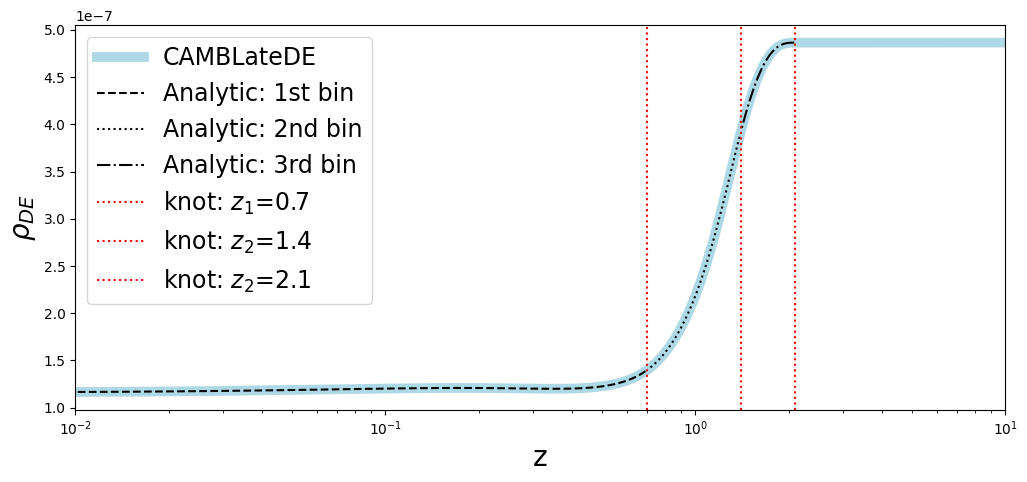

In [27]:
# DE energy density
z = redshift

rho_de_1st_bin, rho_de_2nd_bin, rho_de_3rd_bin = [], [], []
redshift1, redshift2, redshift3 = [], [], []

A00 = 3*(1 + w0 - wa0*z0 + waa0*z0**2)
A10 = 3*(wa0 - 2*waa0*z0)
A20 = 3*waa0

A01 = 3*(1 + w1 - wa1*z1 + waa1*z1**2)
A11 = 3*(wa1 - 2*waa1*z1)
A21 = 3*waa1

A02 = 3*(1 + w2 - wa2*z2 + waa2*z2**2)
A12 = 3*(wa2 - 2*waa2*z2)
A22 = 3*waa2

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

for i in np.arange(len(z)):
    if (z0 < z[i] < z1):
        redshift1.append(z[i])
        grho_de1 = grho_de_today * \
                   (((1+z[i])/(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z[i]-z0)+A20*(z[i]**2-z0**2)/2)
        rho_de_1st_bin.append(grho_de1)
    elif (z1 < z[i] < z2):
        redshift2.append(z[i]) 
        grho_de2 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2   -z0**2)/2) * \
                   (((1+z[i])/(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z[i]-z1)+A21*(z[i]**2 -z1**2)/2)
        rho_de_2nd_bin.append(grho_de2)
    elif (z2 < z[i] < z3):
        redshift3.append(redshift[i])  
        grho_de3 = grho_de_today * \
                   (((1+z1)  /(1+z0))**(A00-A10+A20))*np.exp((A10-A20)*(z1  -z0)+A20*(z1**2  -z0**2)/2) * \
                   (((1+z2)  /(1+z1))**(A01-A11+A21))*np.exp((A11-A21)*(z2  -z1)+A21*(z2**2  -z1**2)/2) * \
                   (((1+z[i])/(1+z2))**(A02-A12+A22))*np.exp((A12-A22)*(z[i]-z2)+A22*(z[i]**2-z2**2)/2)
        rho_de_3rd_bin.append(grho_de3)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,quadratic_rhode_3bins*(redshift+1)**4,'lightblue',label='CAMBLateDE',lw=7)
plt.semilogx(redshift1,rho_de_1st_bin,ls='--',color='black',label=r'Analytic: 1st bin')
plt.semilogx(redshift2,rho_de_2nd_bin,ls=':',color='black',label=r'Analytic: 2nd bin')
plt.semilogx(redshift3,rho_de_3rd_bin,ls='-.',color='black',label=r'Analytic: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_2$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("quadratic_binned_rhode.pdf");

### Section 10a - Cubic $w(z)$: 2 bins - CAMBLateDE

In [28]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [29]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 14,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [30]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, cubic_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
cubic_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

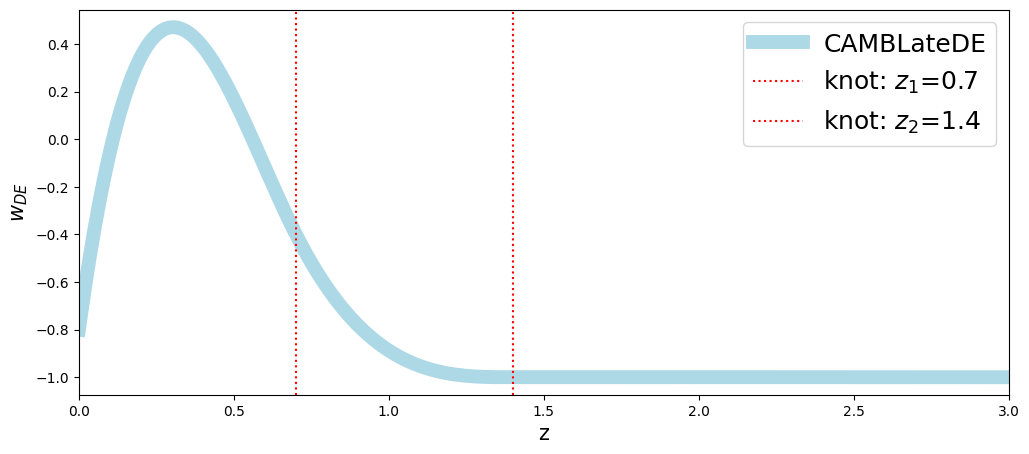

In [31]:
# Model with 2 bins
# z0 = 0
z1 = latede_results.Params.DarkEnergy.z1
z2 = latede_results.Params.DarkEnergy.z2
z3 = latede_results.Params.DarkEnergy.z3

plt.rcParams['figure.figsize'] = [12, 5] 

plt.plot(redshift,cubic_wde_2bins,color='lightblue',lw=10,label='CAMBLateDE')
# plt.plot(redshift1,w_1st_bin,ls='--',color='black',label=r'Analytic $w(z)$: 1st bin')
# plt.plot(redshift2,w_2nd_bin,ls=':',color='black',label=r'Analytic $w(z)$: 2nd bin')
# plt.plot(redshift3,w_3rd_bin,ls='-.',color='black',label=r'Analytic: $w(z)$: 3rd bin')

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.xlabel('z',fontsize=15)
plt.ylabel(r'$w_{DE}$',fontsize=15)
plt.legend(loc='best',fontsize=18)
plt.xlim(0,3);
# plt.savefig("quadratic_binned_w.pdf");

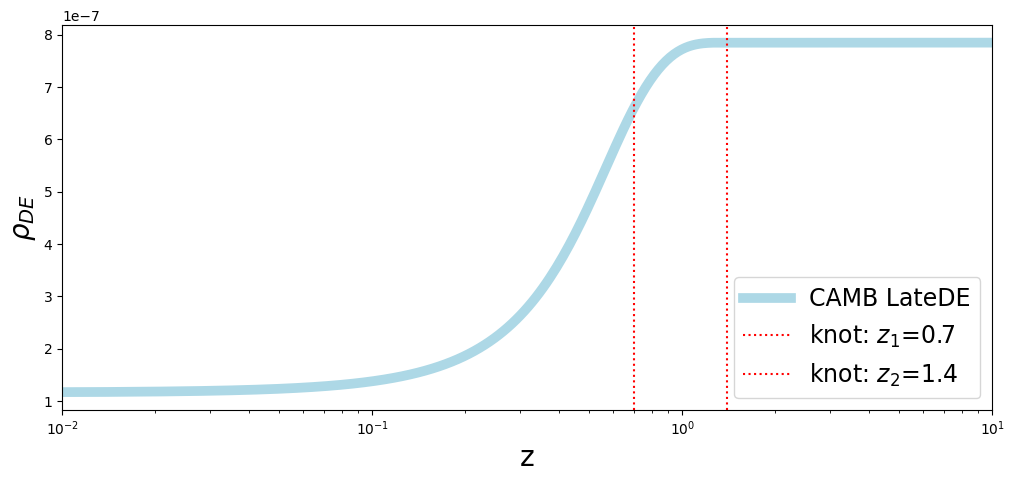

In [32]:
# DE energy density
z = redshift

grho_de_today = 1.1598304491343165E-007 # from CAMB with write(*,*)

plt.rcParams['figure.figsize'] = [12, 5]

plt.semilogx(redshift,cubic_rhode_2bins*(redshift+1)**4,'lightblue',label='CAMB LateDE',lw=7)

plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))

plt.legend(loc='lower right',fontsize=17)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$\rho_{DE}$',fontsize=20)
plt.xlim(0.01,10);
# plt.savefig("cubic_binned_rhode.pdf");

### Section 10b - Cubic $w(z)$: 3 bins - CAMBLateDE

In [33]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


In [34]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 15,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [35]:
scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

latede_results = camb.get_results(latede_cosmology)
rho_test, cubic_wde_2bins = latede_results.get_dark_energy_rho_w(scale_factor)
cubic_rhode_2bins = latede_results.get_background_densities(scale_factor)['de']

### Section 11a - Linear vs Quadratic vs Cubic $w(z)$: 2 bins  - CAMBLateDE

In [36]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Linear 2 bins
cosmology_L_2bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)
# Quadratic 2 bins
cosmology_Q_2bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 11,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Cubic 2 bins
cosmology_C_2bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 14,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_2bins = camb.get_results(cosmology_L_2bins)
rho_L_2bins, wde_L_2bins = results_L_2bins.get_dark_energy_rho_w(scale_factor)
rhode_L_2bins = results_L_2bins.get_background_densities(scale_factor)['de']
# Quadratic w(z)
results_Q_2bins = camb.get_results(cosmology_Q_2bins)
rho_Q_2bins, wde_Q_2bins = results_Q_2bins.get_dark_energy_rho_w(scale_factor)
rhode_Q_2bins = results_Q_2bins.get_background_densities(scale_factor)['de']
# Cubic w(z)
results_C_2bins = camb.get_results(cosmology_C_2bins)
rho_C_2bins, wde_C_2bins = results_C_2bins.get_dark_energy_rho_w(scale_factor)
rhode_C_2bins = results_C_2bins.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


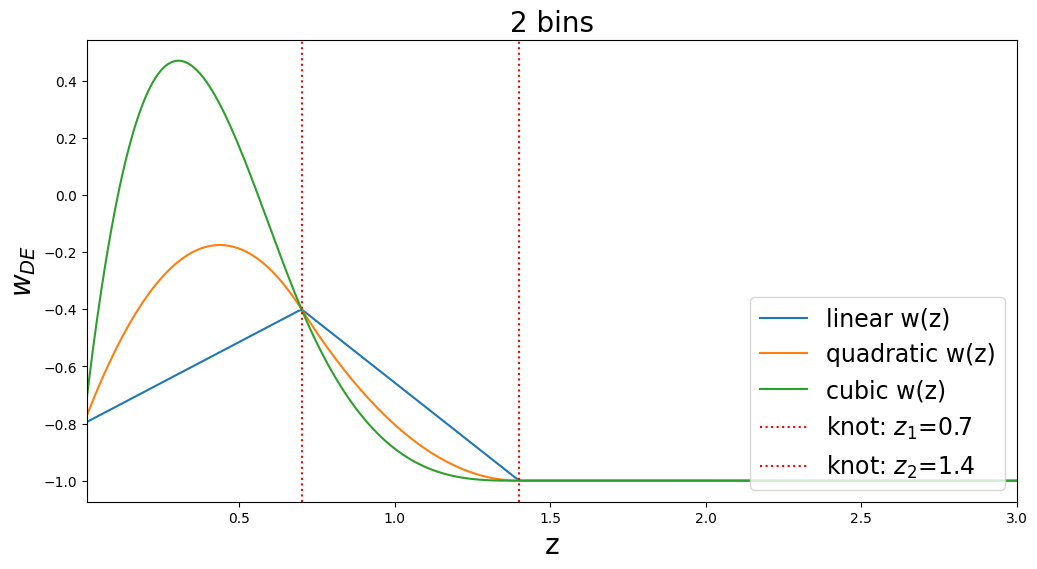

In [37]:
z0 = 0
z1 = results_L_2bins.Params.DarkEnergy.z1
z2 = results_L_2bins.Params.DarkEnergy.z2
z3 = results_L_2bins.Params.DarkEnergy.z3
#
w0 = results_L_2bins.Params.DarkEnergy.w0
w1 = results_L_2bins.Params.DarkEnergy.w1
w2 = results_L_2bins.Params.DarkEnergy.w2
w3 = results_L_2bins.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_z2 = z2-z1
Delta_z3 = z3-z2
Delta_w1 = w1-w0
Delta_w2 = w2-w1
Delta_w3 = w3-w2

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_2bins,label='linear w(z)')
plt.plot(redshift,wde_Q_2bins,label='quadratic w(z)')
plt.plot(redshift,wde_C_2bins,label='cubic w(z)')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.legend(loc='lower right',fontsize=17)
plt.title('2 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,3)
# plt.savefig('wde_2bins_linear_quadratic_cubic.pdf');
plt.show()

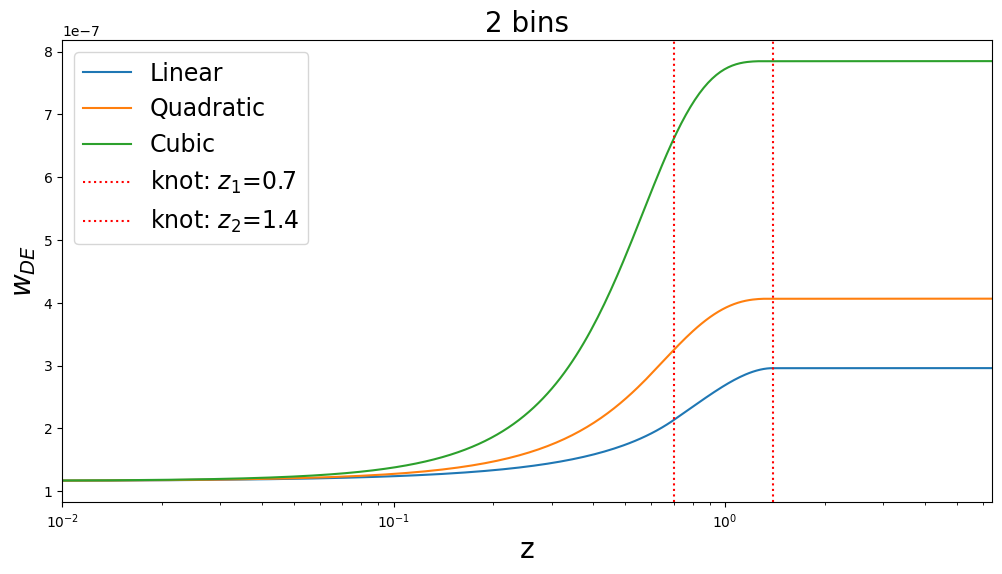

In [38]:
plt.semilogx(redshift,rhode_L_2bins*(1+redshift)**4, label='Linear')
plt.semilogx(redshift,rhode_Q_2bins*(1+redshift)**4, label='Quadratic')
plt.semilogx(redshift,rhode_C_2bins*(1+redshift)**4, label='Cubic')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.legend(loc='best',fontsize=17)
plt.title('2 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,z2+5);

### Section 11b - Linear vs Quadratic vs Cubic $w(z)$: 3 bins  - CAMBLateDE

In [39]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Linear 3 bins
w0_val, w1_val, w2_val = 0, -0.8, -0.2
cosmology_L_3bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 8,
                            w0 = w0_val, w1 = w1_val, w2 = w2_val, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)
# Quadratic 3 bins
cosmology_Q_3bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            w0 = w0_val, w1 = w1_val, w2 = w2_val, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Cubic 3 bins
cosmology_C_3bins = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 15,
                            w0 = w0_val, w1 = w1_val, w2 = w2_val, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_3bins = camb.get_results(cosmology_L_3bins)
rho_L_3bins, wde_L_3bins = results_L_3bins.get_dark_energy_rho_w(scale_factor)
rhode_L_3bins = results_L_3bins.get_background_densities(scale_factor)['de']
# Quadratic w(z)
results_Q_3bins = camb.get_results(cosmology_Q_3bins)
rho_Q_3bins, wde_Q_3bins = results_Q_3bins.get_dark_energy_rho_w(scale_factor)
rhode_Q_3bins = results_Q_3bins.get_background_densities(scale_factor)['de']
# Cubic w(z)
results_C_3bins = camb.get_results(cosmology_C_3bins)
rho_C_3bins, wde_C_3bins = results_C_3bins.get_dark_energy_rho_w(scale_factor)
rhode_C_3bins = results_C_3bins.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


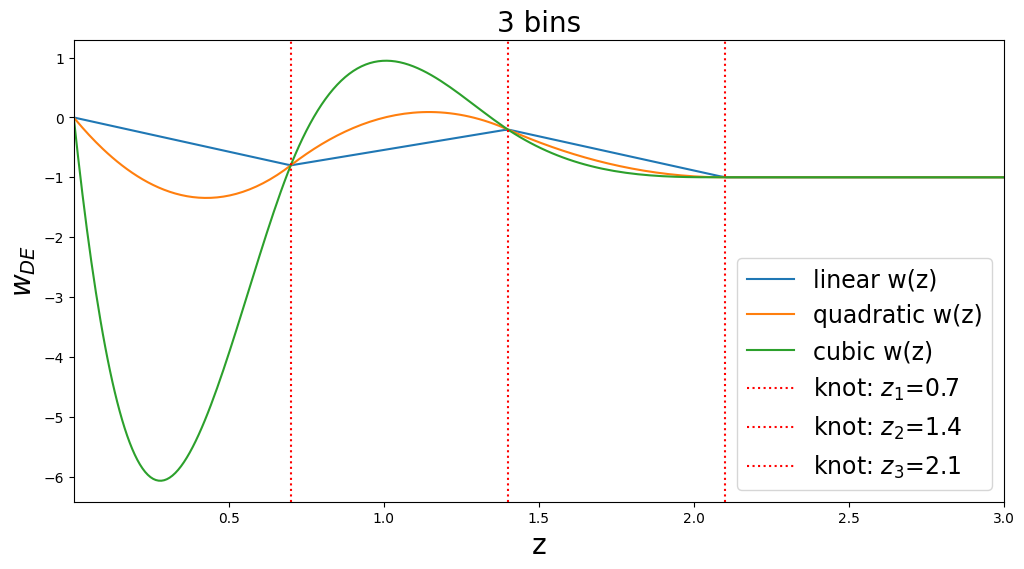

In [40]:
z0 = 0
z1 = results_L_3bins.Params.DarkEnergy.z1
z2 = results_L_3bins.Params.DarkEnergy.z2
z3 = results_L_3bins.Params.DarkEnergy.z3
#
w0 = results_L_3bins.Params.DarkEnergy.w0
w1 = results_L_3bins.Params.DarkEnergy.w1
w2 = results_L_3bins.Params.DarkEnergy.w2
w3 = results_L_3bins.Params.DarkEnergy.w3

Delta_z1 = z1-z0
Delta_z2 = z2-z1
Delta_z3 = z3-z2
Delta_w1 = w1-w0
Delta_w2 = w2-w1
Delta_w3 = w3-w2

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_3bins,label='linear w(z)')
plt.plot(redshift,wde_Q_3bins,label='quadratic w(z)')
plt.plot(redshift,wde_C_3bins,label='cubic w(z)')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))
plt.legend(loc='lower right',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

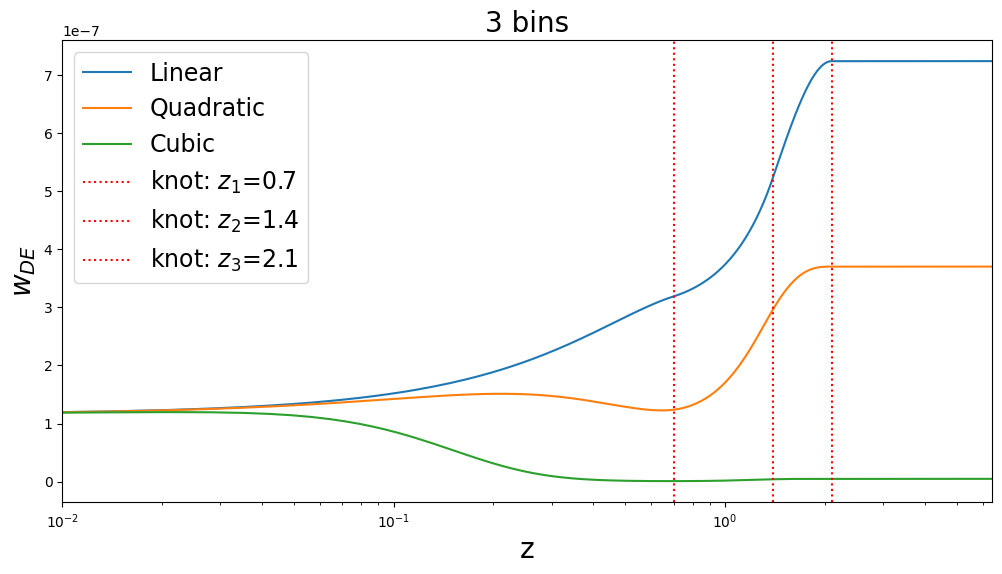

In [41]:
plt.semilogx(redshift,rhode_L_3bins*(1+redshift)**4, label='Linear')
plt.semilogx(redshift,rhode_Q_3bins*(1+redshift)**4, label='Quadratic')
plt.semilogx(redshift,rhode_C_3bins*(1+redshift)**4, label='Cubic')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))
plt.legend(loc='best',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,z2+5);

### Constant w(z): Arbitrary # of bins

In [42]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Constant w(z): estatic number of bins 

DEmodel_est = 5
ws = [-1+0.3*np.sin(i) for i in range(DEmodel_est)]
zs = [0.5*(i+1) for i in range(DEmodel_est)]

cosmology_C_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = DEmodel_est, # Constant 5 bins
                            max_num_of_bins=2,
                            z_knot = [0.7, 1.4],
                            w_knot = [-0.8, -0.4],
                            w0 = ws[0], w1 = ws[1], w2 = ws[2], w3 = ws[3], w4 = ws[4],
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=zs[0], z2=zs[1], z3=zs[2], z4=zs[3], z5=zs[4],
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Constant w(z): dynamical number of bins 
Nbins = 20
cosmology_C_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 18, # arbitrary number of bins with
                            max_num_of_bins=Nbins,
                            z_knot = [0.5*(i+1) for i in range(20)], 
                            w_knot = [-1+0.3*np.sin(i) for i in range(20) ], 
                            w0 = -0.8, w1 = -0.4, w2 = -0.2, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-2, 0, 2000)
redshift = 1/scale_factor - 1

# # Constant dynamic # of bins w(z)
results_C_dyn = camb.get_results(cosmology_C_dyn)
rho_C_dyn, wde_C_dyn = results_C_dyn.get_dark_energy_rho_w(scale_factor)
rhode_C_dyn = results_C_dyn.get_background_densities(scale_factor)['de']

# # Constant estatic # of bins w(z)
results_C_est = camb.get_results(cosmology_C_est)
rho_C_est, wde_C_est = results_C_est.get_dark_energy_rho_w(scale_factor)
rhode_C_est = results_C_est.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /gpfs/projects/MirandaGroup/Diogo/CAMBLateDE/camb


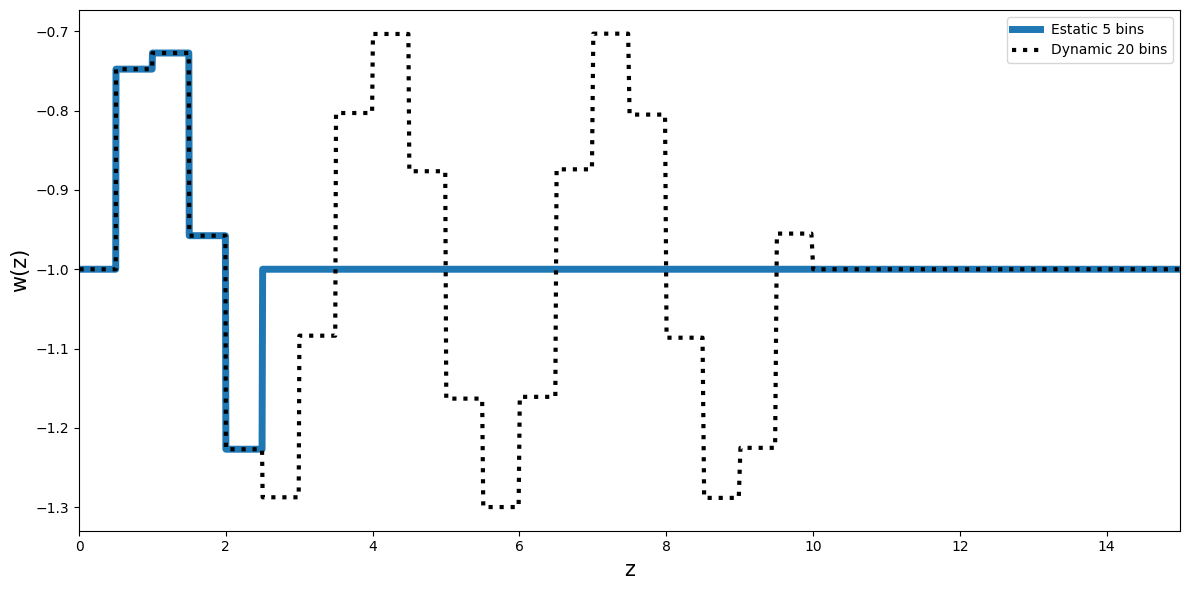

In [43]:
plt.plot(redshift, wde_C_est, lw=5, label=f'Estatic {DEmodel_est} bins');
plt.plot(redshift, wde_C_dyn, lw=3, c='k', ls=':', label=f'Dynamic {Nbins} bins')
plt.legend(loc='best')
plt.xlim(0,15)
plt.ylabel('w(z)',fontsize=15)
plt.xlabel('z',fontsize=15)
plt.tight_layout()
# plt.savefig('/home/grads/data/Diogo/CAMBLateDE/docs/arbitrarynofbins_w.pdf');

(0.0, 15.0)

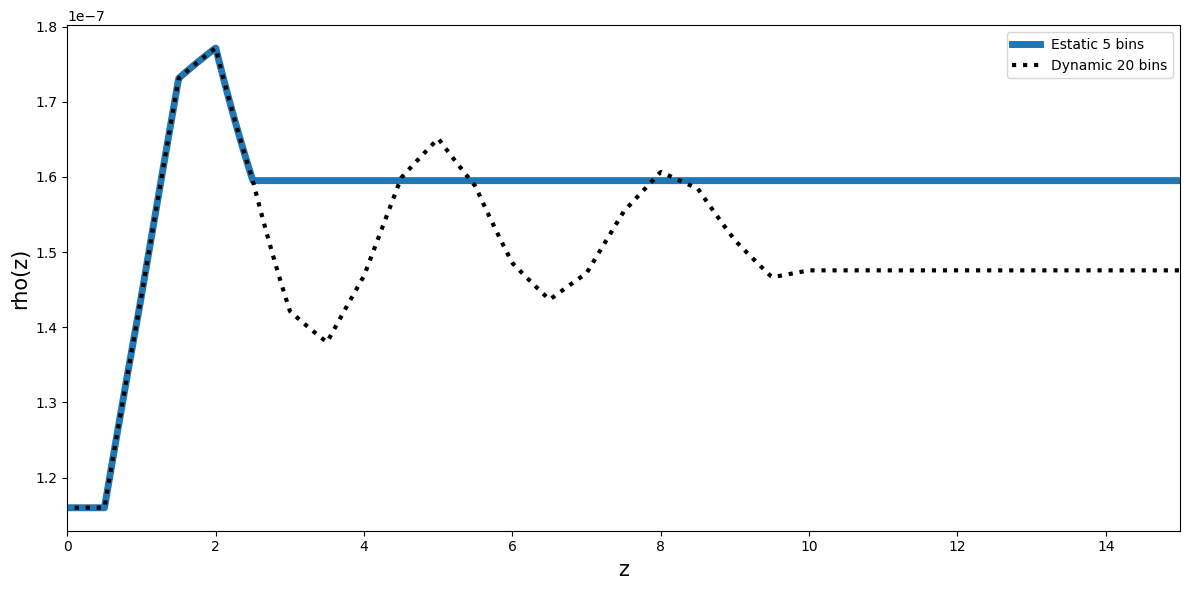

In [44]:
plt.plot(redshift, rho_C_est, lw=5, label=f'Estatic {DEmodel_est} bins')
plt.plot(redshift, rho_C_dyn, lw=3, c='k', ls=':', label=f'Dynamic {Nbins} bins')
plt.legend(loc='best')
plt.ylabel('rho(z)',fontsize=15)
plt.xlabel('z',fontsize=15)
plt.tight_layout()
# plt.savefig('/home/grads/data/Diogo/CAMBLateDE/docs/arbitrarynofbins_rho.pdf');
plt.xlim(0,15)

### From this point, the features have been deleted

Todo: Include back (see commit https://github.com/SBU-COSMOLIKE/CAMB/commit/4f6eb8be8bc14b15337562cee90cf02ee0da56e8)

### Linear w(z): Arbitrary # of bins

In [4]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Linear w(z): estatic number of bins 
cosmology_L_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4, 2.1],
                            w_knot = [-0.8, -0.4, -0.9, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -0.9, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Linear w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4, 2.1],
                            w_knot = [-0.8, -0.4, -0.9, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_est = camb.get_results(cosmology_L_est)
rho_L_est, wde_L_est = results_L_est.get_dark_energy_rho_w(scale_factor)
rhode_L_est = results_L_est.get_background_densities(scale_factor)['de']

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

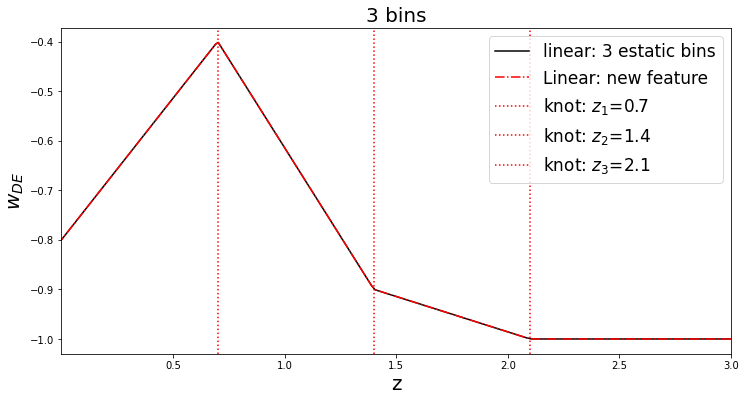

In [4]:
z0 = 0
z1 = results_L_est.Params.DarkEnergy.z1
z2 = results_L_est.Params.DarkEnergy.z2
z3 = results_L_est.Params.DarkEnergy.z3

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_est,label='linear: 3 estatic bins',c='k')
plt.plot(redshift,wde_L_dyn,label='Linear: new feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [14]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 3

z_knot_lst = [random.uniform(0, 2.1) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

z_knot_cut = z_knot_lst[0:4]
w_knot_cut = w_knot_lst[0:4]

# # Linear w(z): estatic number of bins 
cosmology_L_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 7,
                            max_num_of_bins=3,
                            z_knot = z_knot_lst[0:4],
                            w_knot = w_knot_lst[0:4],
                            w0 = w_knot_cut[0], w1 = w_knot_cut[1], w2 = w_knot_cut[2], w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=z_knot_cut[1], z2=z_knot_cut[2], z3=z_knot_cut[3], z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Linear w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_est = camb.get_results(cosmology_L_est)
rho_L_est, wde_L_est = results_L_est.get_dark_energy_rho_w(scale_factor)
rhode_L_est = results_L_est.get_background_densities(scale_factor)['de']

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


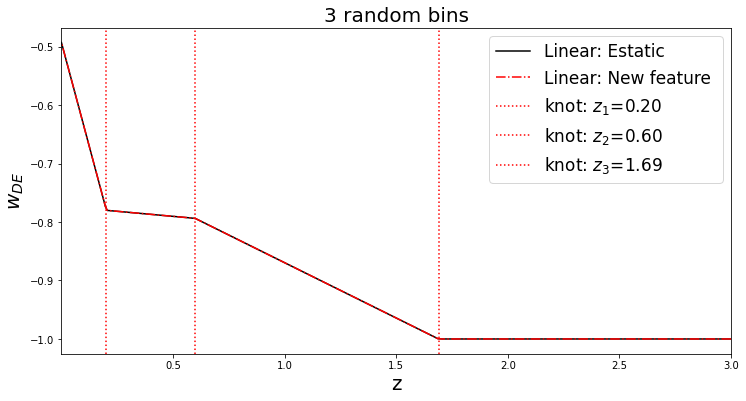

In [27]:
plt.rcParams['figure.figsize'] = [12, 6] 

z1 = results_L_est.Params.DarkEnergy.z1
z2 = results_L_est.Params.DarkEnergy.z2
z3 = results_L_est.Params.DarkEnergy.z3

plt.plot(redshift,wde_L_est,label='Linear: Estatic',c='k',ls='-')
plt.plot(redshift,wde_L_dyn,label='Linear: New feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={:.2f}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={:.2f}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={:.2f}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 random bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [5]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 500

z_knot_lst = [random.uniform(0, 10) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

# Linear w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


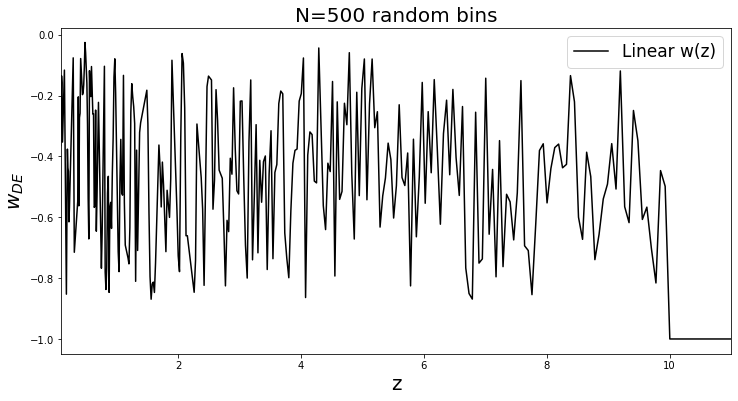

In [7]:
plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_dyn,label='Linear w(z)',c='k',ls='-')

plt.legend(loc='best',fontsize=17)
plt.title('N={} random bins'.format(max_num_of_bins),fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.1,11)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

### Quadratic w(z): Arbitrary # of bins

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Quadratic w(z): estatic number of bins 
cosmology_Q_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 9,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4],
                            w_knot = [-0.8, -0.4, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -0.9, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=3,
                            z_knot = [0, 0.7, 1.4, 2.1],
                            w_knot = [-0.8, -0.4, -0.9, -1],
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Quadratic w(z)
results_Q_est = camb.get_results(cosmology_Q_est)
rho_Q_est, wde_Q_est = results_Q_est.get_dark_energy_rho_w(scale_factor)
rhode_Q_est = results_Q_est.get_background_densities(scale_factor)['de']

# Quadratic w(z)
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


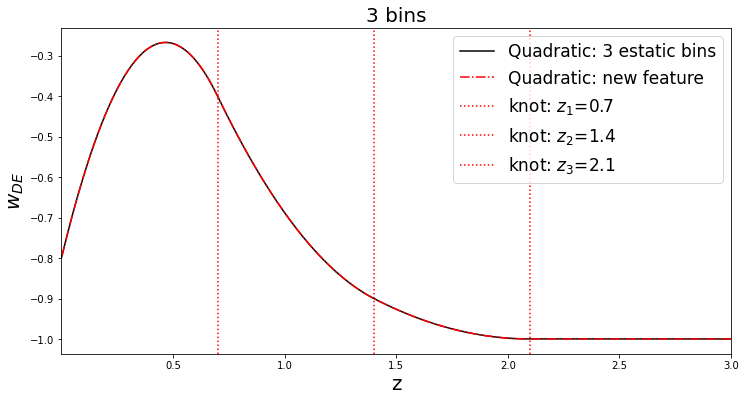

In [2]:
z1 = results_Q_est.Params.DarkEnergy.z1
z2 = results_Q_est.Params.DarkEnergy.z2
z3 = results_Q_est.Params.DarkEnergy.z3

plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_Q_est,label='Quadratic: 3 estatic bins',c='k')
plt.plot(redshift,wde_Q_dyn,label='Quadratic: new feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 3

z_knot_lst = [random.uniform(0, 2.1) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

z_knot_cut = z_knot_lst[0:4]
w_knot_cut = w_knot_lst[0:4]

# Quadratic w(z): estatic number of bins 
cosmology_Q_est = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 9,
                            max_num_of_bins=3,
                            z_knot = z_knot_lst[0:4],
                            w_knot = w_knot_lst[0:4],
                            w0 = w_knot_cut[0], w1 = w_knot_cut[1], w2 = w_knot_cut[2], w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=z_knot_cut[1], z2=z_knot_cut[2], z3=z_knot_cut[3], z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 2000)
redshift = 1/scale_factor - 1

# Quadratic w(z) - 3 estatic bins 
results_Q_est = camb.get_results(cosmology_Q_est)
rho_Q_est, wde_Q_est = results_Q_est.get_dark_energy_rho_w(scale_factor)
rhode_Q_est = results_Q_est.get_background_densities(scale_factor)['de']

# Quadratic w(z) - new feature
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


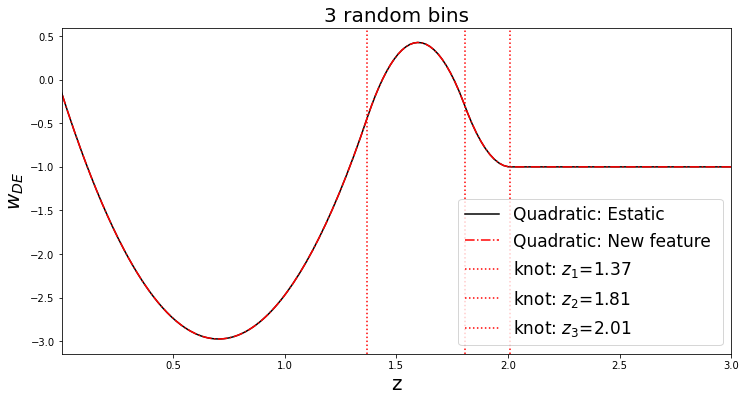

In [2]:
plt.rcParams['figure.figsize'] = [12, 6] 

z1 = results_Q_est.Params.DarkEnergy.z1
z2 = results_Q_est.Params.DarkEnergy.z2
z3 = results_Q_est.Params.DarkEnergy.z3

plt.plot(redshift,wde_Q_est,label='Quadratic: Estatic',c='k',ls='-')
plt.plot(redshift,wde_Q_dyn,label='Quadratic: New feature ',c='r',ls='-.')
plt.axvline(x = z1,ls=':',c='r',label=r'knot: $z_1$={:.2f}'.format(z1))
plt.axvline(x = z2,ls=':',c='r',label=r'knot: $z_2$={:.2f}'.format(z2))
plt.axvline(x = z3,ls=':',c='r',label=r'knot: $z_3$={:.2f}'.format(z3))

plt.legend(loc='best',fontsize=17)
plt.title('3 random bins',fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.0001,3)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

In [3]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))


max_num_of_bins = 100

z_knot_lst = [random.uniform(0, 5) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(0, -0.9) for i in range(max_num_of_bins)]
z_knot_lst.append(0)
z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1,
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 5000)
redshift = 1/scale_factor - 1

# Quadratic w(z)
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


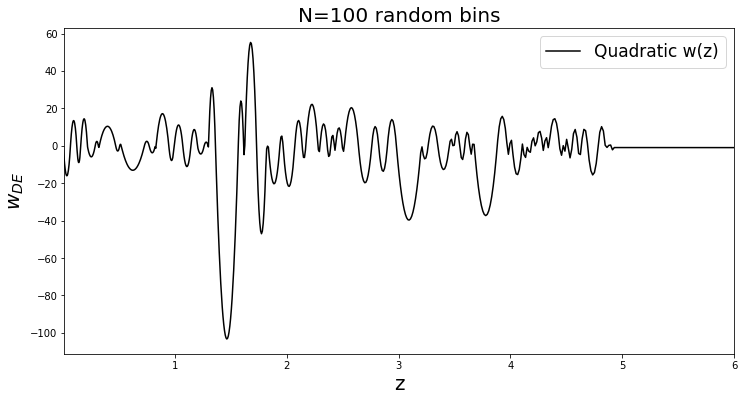

In [4]:
plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_Q_dyn,label='Quadratic w(z)',c='k',ls='-')

plt.legend(loc='best',fontsize=17)
plt.title('N={} random bins'.format(max_num_of_bins),fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
plt.xlim(0.01,6)
# plt.savefig('wde_3bins_linear_quadratic_cubic.pdf');
plt.show()

### Linear vs Quadratic w(z): Arbitrary # of bins

In [25]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys
import random

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

max_num_of_bins = 6

z_knot_lst = np.arange(0,3.5,.5) #[random.uniform(0, 3) for i in range(max_num_of_bins)]
w_knot_lst = [random.uniform(-.5, 0) for i in range(max_num_of_bins)]
# z_knot_lst.append(0)
# z_knot_lst = sorted(z_knot_lst)
w_knot_lst.append(-1)
w_knot_lst = sorted(w_knot_lst)[::-1]

# Quadratic w(z): dynamical number of bins 
cosmology_L_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 12,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

# Quadratic w(z): dynamical number of bins 
cosmology_Q_dyn = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'ppf',
                            DEmodel = 13,
                            max_num_of_bins=max_num_of_bins,
                            z_knot = z_knot_lst,
                            w_knot = w_knot_lst,
                            w0 = -0.8, w1 = -0.4, w2 = -1, w3 = -1, w4 = -1,
                            w5 = -1, w6 = -1, w7 = -1, w8 = -1, w9 = -1, 
                            z1=0.7, z2=1.4, z3=2.1, z4=2.8, z5=3.5,
                            z6=4.2, z7=4.9, z8=5.6, z9=6.3, z10=7.0,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

scale_factor = np.logspace(-6, 0, 5000)
redshift = 1/scale_factor - 1

# Linear w(z)
results_L_dyn = camb.get_results(cosmology_L_dyn)
rho_L_dyn, wde_L_dyn = results_L_dyn.get_dark_energy_rho_w(scale_factor)
rhode_L_dyn = results_L_dyn.get_background_densities(scale_factor)['de']

# Quadratic w(z)
results_Q_dyn = camb.get_results(cosmology_Q_dyn)
rho_Q_dyn, wde_Q_dyn = results_Q_dyn.get_dark_energy_rho_w(scale_factor)
rhode_Q_dyn = results_Q_dyn.get_background_densities(scale_factor)['de']

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


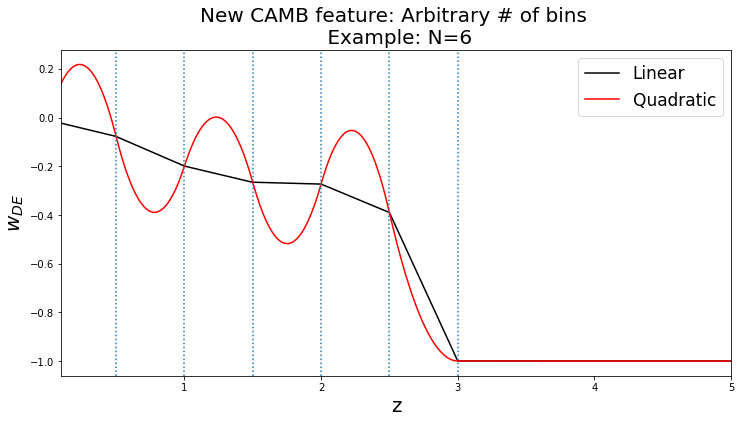

In [26]:
plt.rcParams['figure.figsize'] = [12, 6] 

plt.plot(redshift,wde_L_dyn,label='Linear',c='k',ls='-')
plt.plot(redshift,wde_Q_dyn,label='Quadratic',c='r',ls='-')

for i in np.arange(len(z_knot_lst)):
    plt.axvline(x = z_knot_lst[i],ls=':',c='C0')

plt.legend(loc='best',fontsize=17)
plt.title('New CAMB feature: Arbitrary # of bins \n Example: N={}'.format(max_num_of_bins),fontsize=20)
plt.xlabel('z',fontsize=20)
plt.ylabel(r'$w_{DE}$',fontsize=20)
# plt.xscale('log')
plt.xlim(0.1,5)
# plt.ylim(-1,1)
# plt.savefig('wde_Nbins_linear_quadratic.pdf');
plt.show()

In [15]:
np.arange(0,3.5,.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])